In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, RFE
from sklearn.impute import KNNImputer 
from sklearn.model_selection import (KFold, StratifiedKFold, LeaveOneOut, 
                                     cross_val_score, validation_curve, validation_curve, 
                                     GridSearchCV)
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, classification_report)

In [2]:
df_fighers = pd.read_csv("raw_fighter_details.csv")
df_bout = pd.read_csv("raw_total_fight_data.csv", sep=';')

In [3]:
df_bout.head()

R_fighter          B_fighter  R_KD  B_KD R_SIG_STR. B_SIG_STR.   
0   Adrian Yanez      Gustavo Lopez     2     0  41 of 103   23 of 51  \
1   Trevin Giles      Roman Dolidze     0     0   27 of 57   32 of 67   
2    Tai Tuivasa    Harry Hunsucker     1     0   14 of 18     2 of 6   
3  Cheyanne Buys  Montserrat Conejo     0     0   31 of 65   15 of 41   
4  Marion Reneau      Macy Chiasson     0     0   30 of 63  51 of 138   

  R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ... B_GROUND   
0           39%           45%    41 of 103     23 of 51  ...   0 of 0  \
1           47%           47%     43 of 73    75 of 110  ...   1 of 2   
2           77%           33%     14 of 18       2 of 6  ...   0 of 0   
3           47%           36%     49 of 87   136 of 168  ...   0 of 0   
4           47%           36%     59 of 93    92 of 184  ...   2 of 4   

                 win_by last_round last_round_time         Format   
0                KO/TKO          3            0:27  3 Rnd (5-5-5)  \
1  Decision - Unanimous          3            5:00  3 Rnd (5-5-5)   
2                KO/TKO          1            0:49  3 Rnd (5-5-5)   
3  Decision - Unanimous          3            5:00  3 Rnd (5-5-5)   
4  Decision - Unanimous          3            5:00  3 Rnd (5-5-5)   

         Referee            date                location   
0  Chris Tognoni  March 20, 2021  Las Vegas, Nevada, USA  \
1      Herb Dean  March 20, 2021  Las Vegas, Nevada, USA   
2      Herb Dean  March 20, 2021  Las Vegas, Nevada, USA   
3     Mark Smith  March 20, 2021  Las Vegas, Nevada, USA   
4     Mark Smith  March 20, 2021  Las Vegas, Nevada, USA   

                  Fight_type             Winner  
0          Bantamweight Bout       Adrian Yanez  
1          Middleweight Bout       Trevin Giles  
2           Heavyweight Bout        Tai Tuivasa  
3   Women's Strawweight Bout  Montserrat Conejo  
4  Women's Bantamweight Bout      Macy Chiasson  

[5 rows x 41 columns]

In [4]:
df_fighers.head()

fighter_name  Height    Weight Reach    Stance           DOB  SLpM   
0            Tom Aaron     NaN  155 lbs.   NaN       NaN  Jul 13, 1978  0.00  \
1           Papy Abedi  5' 11"  185 lbs.   NaN  Southpaw  Jun 30, 1978  2.80   
2  Shamil Abdurakhimov   6' 3"  235 lbs.   76"  Orthodox  Sep 02, 1981  2.45   
3         Danny Abbadi  5' 11"  155 lbs.   NaN  Orthodox  Jul 03, 1983  3.29   
4         Hiroyuki Abe   5' 6"  145 lbs.   NaN  Orthodox           NaN  1.71   

  Str_Acc  SApM Str_Def  TD_Avg TD_Acc TD_Def  Sub_Avg  
0      0%  0.00      0%    0.00     0%     0%      0.0  
1     55%  3.15     48%    3.47    57%    50%      1.3  
2     44%  2.45     58%    1.23    24%    47%      0.2  
3     38%  4.41     57%    0.00     0%    77%      0.0  
4     36%  3.11     63%    0.00     0%    33%      0.0

In [5]:
df_bout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        6012 non-null   object
 1   B_fighter        6012 non-null   object
 2   R_KD             6012 non-null   int64 
 3   B_KD             6012 non-null   int64 
 4   R_SIG_STR.       6012 non-null   object
 5   B_SIG_STR.       6012 non-null   object
 6   R_SIG_STR_pct    6012 non-null   object
 7   B_SIG_STR_pct    6012 non-null   object
 8   R_TOTAL_STR.     6012 non-null   object
 9   B_TOTAL_STR.     6012 non-null   object
 10  R_TD             6012 non-null   object
 11  B_TD             6012 non-null   object
 12  R_TD_pct         6012 non-null   object
 13  B_TD_pct         6012 non-null   object
 14  R_SUB_ATT        6012 non-null   int64 
 15  B_SUB_ATT        6012 non-null   int64 
 16  R_REV            6012 non-null   int64 
 17  B_REV            6012 non-null   

### Data Exploring & features and dropping redundant columns etc.

Merging DFs to have a represenation of the acutal fights with opponents

In [6]:
df = df_bout.merge(df_fighers, how='left', left_on='R_fighter', right_on='fighter_name')
df = df.merge(df_fighers, how='left', left_on='B_fighter', right_on='fighter_name',suffixes=('_Red', '_Blue'))
df.head()

R_fighter          B_fighter  R_KD  B_KD R_SIG_STR. B_SIG_STR.   
0   Adrian Yanez      Gustavo Lopez     2     0  41 of 103   23 of 51  \
1   Trevin Giles      Roman Dolidze     0     0   27 of 57   32 of 67   
2    Tai Tuivasa    Harry Hunsucker     1     0   14 of 18     2 of 6   
3  Cheyanne Buys  Montserrat Conejo     0     0   31 of 65   15 of 41   
4  Marion Reneau      Macy Chiasson     0     0   30 of 63  51 of 138   

  R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ... Stance_Blue   
0           39%           45%    41 of 103     23 of 51  ...    Orthodox  \
1           47%           47%     43 of 73    75 of 110  ...    Orthodox   
2           77%           33%     14 of 18       2 of 6  ...    Orthodox   
3           47%           36%     49 of 87   136 of 168  ...    Southpaw   
4           47%           36%     59 of 93    92 of 184  ...    Orthodox   

       DOB_Blue SLpM_Blue Str_Acc_Blue  SApM_Blue  Str_Def_Blue  TD_Avg_Blue   
0  Jun 27, 1989      2.24          41%       4.65           51%         1.07  \
1  Jul 15, 1988      2.98          51%       1.75           61%         1.75   
2  Jan 03, 1989      4.33          51%       8.44           41%         0.00   
3  Feb 03, 1993      1.00          36%       2.07           52%         4.00   
4  Jul 27, 1991      4.16          49%       2.17           46%         0.98   

   TD_Acc_Blue TD_Def_Blue Sub_Avg_Blue  
0          50%         27%          0.5  
1          50%         33%          2.2  
2           0%          0%          0.0  
3          80%          0%          2.0  
4          21%         64%          0.5  

[5 rows x 69 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R_fighter          6012 non-null   object 
 1   B_fighter          6012 non-null   object 
 2   R_KD               6012 non-null   int64  
 3   B_KD               6012 non-null   int64  
 4   R_SIG_STR.         6012 non-null   object 
 5   B_SIG_STR.         6012 non-null   object 
 6   R_SIG_STR_pct      6012 non-null   object 
 7   B_SIG_STR_pct      6012 non-null   object 
 8   R_TOTAL_STR.       6012 non-null   object 
 9   B_TOTAL_STR.       6012 non-null   object 
 10  R_TD               6012 non-null   object 
 11  B_TD               6012 non-null   object 
 12  R_TD_pct           6012 non-null   object 
 13  B_TD_pct           6012 non-null   object 
 14  R_SUB_ATT          6012 non-null   int64  
 15  B_SUB_ATT          6012 non-null   int64  
 16  R_REV              6012 

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
print(df.shape)
df.duplicated().sum()

(6012, 69)


0

In [10]:
print(df['win_by'].value_counts())

win_by
Decision - Unanimous       2097
KO/TKO                     1905
Submission                 1211
Decision - Split            568
TKO - Doctor's Stoppage      80
Decision - Majority          66
Overturned                   48
DQ                           18
Could Not Continue           17
Other                         2
Name: count, dtype: int64


In [11]:
summary = df.describe()
print(tabulate(summary, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒═══════╤══════════╤══════════╤═════════════╤═════════════╤══════════╤══════════╤══════════════╤════════════╤════════════╤══════════════╤═══════════════╤═════════════╤═════════════╤═══════════════╤════════════════╕
│       │   R_KD   │   B_KD   │  R_SUB_ATT  │  B_SUB_ATT  │  R_REV   │  B_REV   │  last_round  │  SLpM_Red  │  SApM_Red  │  TD_Avg_Red  │  Sub_Avg_Red  │  SLpM_Blue  │  SApM_Blue  │  TD_Avg_Blue  │  Sub_Avg_Blue  │
╞═══════╪══════════╪══════════╪═════════════╪═════════════╪══════════╪══════════╪══════════════╪════════════╪════════════╪══════════════╪═══════════════╪═════════════╪═════════════╪═══════════════╪════════════════╡
│ count │   6012   │   6012   │    6012     │    6012     │   6012   │   6012   │     6012     │    6012    │    6012    │     6012     │     6012      │    6012     │    6012     │     6012      │      6012      │
├───────┼──────────┼──────────┼─────────────┼─────────────┼──────────┼──────────┼──────────────┼────────────┼────────────┼──────────────┼───

In the table above we can see some stats leaning towards the fighter from the red corner, this is likely due to the fact that the "favourite" fighter generally starts from this corner.

In [12]:
summary = df.describe(include='object')
print(tabulate(summary, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒════════╤═════════════╤═════════════════╤══════════════╤══════════════╤═════════════════╤═════════════════╤════════════════╤════════════════╤════════╤════════╤════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═════════╤═════════╤══════════════╤══════════════╤════════════╤════════════╤════════════╤════════════╤══════════════════════╤═══════════════════╤═══════════════╤═══════════╤═══════════════════╤════════════════════════╤══════════════════╤════════════════╤════════════════════╤══════════════╤══════════════╤═════════════╤══════════════╤══════════════╤═══════════════╤═══════════════╤══════════════╤══════════════╤═════════════════════╤═══════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╤════════════════╤════════════════╤═══════════════╤═══════════════╕
│        │ R_fighter   │ B_fighter       │ R_SIG_STR.   │ B_SIG_STR.   │ R_SIG_STR_pct   │ B_SIG_STR_pct   │ R_TOTAL_STR.   │ B_TOTAL_STR.   │ R_TD   │ B_TD   │ R_TD_pct 

In [13]:
df.isna().sum()

R_fighter              0
B_fighter              0
R_KD                   0
B_KD                   0
R_SIG_STR.             0
B_SIG_STR.             0
R_SIG_STR_pct          0
B_SIG_STR_pct          0
R_TOTAL_STR.           0
B_TOTAL_STR.           0
R_TD                   0
B_TD                   0
R_TD_pct               0
B_TD_pct               0
R_SUB_ATT              0
B_SUB_ATT              0
R_REV                  0
B_REV                  0
R_CTRL                 0
B_CTRL                 0
R_HEAD                 0
B_HEAD                 0
R_BODY                 0
B_BODY                 0
R_LEG                  0
B_LEG                  0
R_DISTANCE             0
B_DISTANCE             0
R_CLINCH               0
B_CLINCH               0
R_GROUND               0
B_GROUND               0
win_by                 0
last_round             0
last_round_time        0
Format                 0
Referee               32
date                   0
location               0
Fight_type             0


In [14]:
df = df.drop(columns=['Referee', 'Reach_Red', 'Reach_Blue', 'DOB_Red', 'DOB_Blue'])
df.isna().sum()

R_fighter              0
B_fighter              0
R_KD                   0
B_KD                   0
R_SIG_STR.             0
B_SIG_STR.             0
R_SIG_STR_pct          0
B_SIG_STR_pct          0
R_TOTAL_STR.           0
B_TOTAL_STR.           0
R_TD                   0
B_TD                   0
R_TD_pct               0
B_TD_pct               0
R_SUB_ATT              0
B_SUB_ATT              0
R_REV                  0
B_REV                  0
R_CTRL                 0
B_CTRL                 0
R_HEAD                 0
B_HEAD                 0
R_BODY                 0
B_BODY                 0
R_LEG                  0
B_LEG                  0
R_DISTANCE             0
B_DISTANCE             0
R_CLINCH               0
B_CLINCH               0
R_GROUND               0
B_GROUND               0
win_by                 0
last_round             0
last_round_time        0
Format                 0
date                   0
location               0
Fight_type             0
Winner               110


There are some missing values, for the winner column they all have to be presumed to be due to a draw or a NC (No Contest), due to some rule-breaking or illegaly inflicted injury during the fight. As for the others, they are more difficult to make a presumtion, most likely due to old fights with missing data.

These will be cleaned below.

In [15]:
df = df.dropna(subset=['Winner', 'Height_Blue', 'Height_Red', 'Weight_Blue', 'Weight_Red'])
df['Stance_Blue'] = df['Stance_Blue'].fillna(df['Stance_Blue'].mode()[0])
df['Stance_Red'] = df['Stance_Red'].fillna(df['Stance_Red'].mode()[0])
df.isna().sum()

R_fighter            0
B_fighter            0
R_KD                 0
B_KD                 0
R_SIG_STR.           0
B_SIG_STR.           0
R_SIG_STR_pct        0
B_SIG_STR_pct        0
R_TOTAL_STR.         0
B_TOTAL_STR.         0
R_TD                 0
B_TD                 0
R_TD_pct             0
B_TD_pct             0
R_SUB_ATT            0
B_SUB_ATT            0
R_REV                0
B_REV                0
R_CTRL               0
B_CTRL               0
R_HEAD               0
B_HEAD               0
R_BODY               0
B_BODY               0
R_LEG                0
B_LEG                0
R_DISTANCE           0
B_DISTANCE           0
R_CLINCH             0
B_CLINCH             0
R_GROUND             0
B_GROUND             0
win_by               0
last_round           0
last_round_time      0
Format               0
date                 0
location             0
Fight_type           0
Winner               0
fighter_name_Red     0
Height_Red           0
Weight_Red           0
Stance_Red 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 6011
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R_fighter          5890 non-null   object 
 1   B_fighter          5890 non-null   object 
 2   R_KD               5890 non-null   int64  
 3   B_KD               5890 non-null   int64  
 4   R_SIG_STR.         5890 non-null   object 
 5   B_SIG_STR.         5890 non-null   object 
 6   R_SIG_STR_pct      5890 non-null   object 
 7   B_SIG_STR_pct      5890 non-null   object 
 8   R_TOTAL_STR.       5890 non-null   object 
 9   B_TOTAL_STR.       5890 non-null   object 
 10  R_TD               5890 non-null   object 
 11  B_TD               5890 non-null   object 
 12  R_TD_pct           5890 non-null   object 
 13  B_TD_pct           5890 non-null   object 
 14  R_SUB_ATT          5890 non-null   int64  
 15  B_SUB_ATT          5890 non-null   int64  
 16  R_REV              5890 non-n

In [17]:
def winner(x,red,blue):
    if red in x:
        return 1
    elif blue in x:
        return 0

In [18]:
df['winner_color'] = df[['Winner','R_fighter','B_fighter']].apply(lambda x: winner(x['Winner'], x['R_fighter'], x['B_fighter']), axis=1)
df['winner_color'].value_counts()

winner_color
1    3968
0    1922
Name: count, dtype: int64

In [19]:
df['winner_color'] = pd.to_numeric(df['winner_color'], errors='coerce')

In [20]:
df = df.drop(columns=['R_fighter','B_fighter'])

In [21]:
df['R_SIG_STRIKE_LANDED'] = df['R_SIG_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['R_SIG_STRIKE_TOTAL'] = df['R_SIG_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['B_SIG_STRIKE_LANDED'] = df['B_SIG_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['B_SIG_STRIKE_TOTAL'] = df['B_SIG_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['R_TOTAL_STRIKE_LANDED'] = df['R_TOTAL_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['R_TOTAL_STRIKE_TOTAL'] = df['R_TOTAL_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['B_TOTAL_STRIKE_LANDED'] = df['B_TOTAL_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['B_TOTAL_STRIKE_TOTAL'] = df['B_TOTAL_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['R_TD_STRIKE_LANDED'] = df['R_TD'].apply(lambda x: x.split()[0]).astype(int)
df['R_TD_STRIKE_TOTAL'] = df['R_TD'].apply(lambda x: x.split()[2]).astype(int)
df['B_TD_STRIKE_LANDED'] = df['B_TD'].apply(lambda x: x.split()[0]).astype(int)
df['B_TD_STRIKE_TOTAL'] = df['B_TD'].apply(lambda x: x.split()[2]).astype(int)
df['R_HEAD_LANDED'] = df['R_HEAD'].apply(lambda x: x.split()[0]).astype(int)
df['R_HEAD_TOTAL'] = df['R_HEAD'].apply(lambda x: x.split()[2]).astype(int)
df['B_HEAD_LANDED'] = df['B_HEAD'].apply(lambda x: x.split()[0]).astype(int)
df['B_HEAD_TOTAL'] = df['B_HEAD'].apply(lambda x: x.split()[2]).astype(int)
df['R_BODY_LANDED'] = df['R_BODY'].apply(lambda x: x.split()[0]).astype(int)
df['R_BODY_TOTAL'] = df['R_BODY'].apply(lambda x: x.split()[2]).astype(int)
df['B_BODY_LANDED'] = df['B_BODY'].apply(lambda x: x.split()[0]).astype(int)
df['B_BODY_TOTAL'] = df['B_BODY'].apply(lambda x: x.split()[2]).astype(int)
df['R_LEG_LANDED'] = df['R_LEG'].apply(lambda x: x.split()[0]).astype(int)
df['R_LEG_TOTAL'] = df['R_LEG'].apply(lambda x: x.split()[2]).astype(int)
df['B_LEG_LANDED'] = df['B_LEG'].apply(lambda x: x.split()[0]).astype(int)
df['B_LEG_TOTAL'] = df['B_LEG'].apply(lambda x: x.split()[2]).astype(int)
df['R_DISTANCE_LANDED'] = df['R_DISTANCE'].apply(lambda x: x.split()[0]).astype(int)
df['R_DISTANCE_TOTAL'] = df['R_DISTANCE'].apply(lambda x: x.split()[2]).astype(int)
df['B_DISTANCE_LANDED'] = df['B_DISTANCE'].apply(lambda x: x.split()[0]).astype(int)
df['B_DISTANCE_TOTAL'] = df['B_DISTANCE'].apply(lambda x: x.split()[2]).astype(int)
df['R_CLINCH_LANDED'] = df['R_CLINCH'].apply(lambda x: x.split()[0]).astype(int)
df['R_CLINCH_TOTAL'] = df['R_CLINCH'].apply(lambda x: x.split()[2]).astype(int)
df['B_CLINCH_LANDED'] = df['B_CLINCH'].apply(lambda x: x.split()[0]).astype(int)
df['B_CLINCH_TOTAL'] = df['B_CLINCH'].apply(lambda x: x.split()[2]).astype(int)
df['R_GROUND_LANDED'] = df['R_GROUND'].apply(lambda x: x.split()[0]).astype(int)
df['R_GROUND_TOTAL'] = df['R_GROUND'].apply(lambda x: x.split()[2]).astype(int)
df['B_GROUND_LANDED'] = df['B_GROUND'].apply(lambda x: x.split()[0]).astype(int)
df['B_GROUND_TOTAL'] = df['B_GROUND'].apply(lambda x: x.split()[2]).astype(int)

In [22]:
df = df.drop(columns=['R_SIG_STR.','B_SIG_STR.','R_TOTAL_STR.','B_TOTAL_STR.','R_TD','B_TD','R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_DISTANCE','B_DISTANCE','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND'])

In [23]:
df['R_SIG_STR_pct'] = df['R_SIG_STR_pct'].str.strip('%')
df['B_SIG_STR_pct'] = df['B_SIG_STR_pct'].str.strip('%')
df['R_TD_pct'] = df['R_TD_pct'].str.strip('%')
df['B_TD_pct'] = df['B_TD_pct'].str.strip('%')
df['Str_Acc_Red'] = df['Str_Acc_Red'].str.strip('%')
df['Str_Def_Red'] = df['Str_Def_Red'].str.strip('%')
df['TD_Acc_Red'] = df['TD_Acc_Red'].str.strip('%')
df['TD_Def_Red'] = df['TD_Def_Red'].str.strip('%')
df['Str_Acc_Blue'] = df['Str_Acc_Blue'].str.strip('%')
df['Str_Def_Blue'] = df['Str_Def_Blue'].str.strip('%')
df['TD_Acc_Blue'] = df['TD_Acc_Blue'].str.strip('%')
df['TD_Def_Blue'] = df['TD_Def_Blue'].str.strip('%')

In [24]:
from datetime import timedelta
def timer(x):
    if x == '--':
        return 0
    else:
        mins, secs = map(float, x.split(':'))
        td = timedelta(minutes=mins, seconds=secs)
        return int(td.total_seconds())

In [25]:
df['R_CTRL'] = df['R_CTRL'].apply(timer)
df['B_CTRL'] = df['B_CTRL'].apply(timer)

In [26]:
df = df.drop(columns=['Winner','Format','win_by','last_round','last_round_time','date','location','fighter_name_Red','fighter_name_Blue', 'Weight_Red', 'Weight_Blue'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 6011
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_KD                   5890 non-null   int64  
 1   B_KD                   5890 non-null   int64  
 2   R_SIG_STR_pct          5890 non-null   object 
 3   B_SIG_STR_pct          5890 non-null   object 
 4   R_TD_pct               5890 non-null   object 
 5   B_TD_pct               5890 non-null   object 
 6   R_SUB_ATT              5890 non-null   int64  
 7   B_SUB_ATT              5890 non-null   int64  
 8   R_REV                  5890 non-null   int64  
 9   B_REV                  5890 non-null   int64  
 10  R_CTRL                 5890 non-null   int64  
 11  B_CTRL                 5890 non-null   int64  
 12  Fight_type             5890 non-null   object 
 13  Height_Red             5890 non-null   object 
 14  Stance_Red             5890 non-null   object 
 15  SLpM_Red 

In [28]:
df['titlebout'] = df['Fight_type'].apply(lambda x: 1 if 'Title' in x else 0)

In [29]:
df = df.drop(columns=['Fight_type'])

In [30]:
df['Height_Red'] = df['Height_Red'].apply(lambda x: (int(x.split()[0].strip("/'"))*12) + (int(x.split()[1].strip('/""'))))
df['Height_Blue'] = df['Height_Blue'].apply(lambda x: (int(x.split()[0].strip("/'"))*12) + (int(x.split()[1].strip('/""'))))

In [31]:
df['R_TD_pct'] = df['R_TD_pct'].str.replace('---', '0').astype(int)
df['B_TD_pct'] = df['B_TD_pct'].str.replace('---', '0').astype(int)
df['R_SIG_STR_pct'] = df['R_SIG_STR_pct'].str.replace('---', '0').astype(int)
df['B_SIG_STR_pct'] = df['B_SIG_STR_pct'].str.replace('---', '0').astype(int)
df['Str_Acc_Red'] = df['Str_Acc_Red'].astype(int)
df['Str_Acc_Blue'] = df['Str_Acc_Blue'].astype(int)
df['Str_Def_Red'] = df['Str_Def_Red'].astype(int)
df['Str_Def_Blue'] = df['Str_Def_Blue'].astype(int)
df['TD_Acc_Red'] = df['TD_Acc_Red'].astype(int)
df['TD_Acc_Blue'] = df['TD_Acc_Blue'].astype(int)
df['TD_Def_Red'] = df['TD_Def_Red'].astype(int)
df['TD_Def_Blue'] = df['TD_Def_Blue'].astype(int)

In [32]:
mapping = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
df['Stance_R'] = df['Stance_Red'].replace(mapping)
df['Stance_B'] = df['Stance_Blue'].replace(mapping)

In [33]:
df['Stance_R'] = pd.to_numeric(df['Stance_R'], errors='coerce')
df['Stance_B'] = pd.to_numeric(df['Stance_B'], errors='coerce')

In [34]:
df = df.drop(columns=['Stance_Red','Stance_Blue'])

In [35]:
df = df.dropna(subset=['Stance_R', 'Stance_B'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5884 entries, 0 to 6011
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_KD                   5884 non-null   int64  
 1   B_KD                   5884 non-null   int64  
 2   R_SIG_STR_pct          5884 non-null   int32  
 3   B_SIG_STR_pct          5884 non-null   int32  
 4   R_TD_pct               5884 non-null   int32  
 5   B_TD_pct               5884 non-null   int32  
 6   R_SUB_ATT              5884 non-null   int64  
 7   B_SUB_ATT              5884 non-null   int64  
 8   R_REV                  5884 non-null   int64  
 9   B_REV                  5884 non-null   int64  
 10  R_CTRL                 5884 non-null   int64  
 11  B_CTRL                 5884 non-null   int64  
 12  Height_Red             5884 non-null   int64  
 13  SLpM_Red               5884 non-null   float64
 14  Str_Acc_Red            5884 non-null   int32  
 15  SApM_Red 

# Plots

In [37]:
numeric_columns = [
    'R_KD', 'B_KD', 'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct',
    'R_SUB_ATT', 'B_SUB_ATT', 'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL',
    'R_SIG_STRIKE_LANDED', 'R_SIG_STRIKE_TOTAL', 'B_SIG_STRIKE_LANDED', 'B_SIG_STRIKE_TOTAL',
    'R_TOTAL_STRIKE_LANDED', 'B_TOTAL_STRIKE_LANDED', 'R_TOTAL_STRIKE_TOTAL', 'B_TOTAL_STRIKE_TOTAL',
    'R_TD_STRIKE_LANDED','B_TD_STRIKE_LANDED',  'R_TD_STRIKE_TOTAL', 'B_TD_STRIKE_TOTAL',
    'R_HEAD_LANDED','B_HEAD_LANDED',  'R_HEAD_TOTAL', 'B_HEAD_TOTAL',
    'R_BODY_LANDED', 'B_BODY_LANDED', 'R_BODY_TOTAL', 'B_BODY_TOTAL',
    'R_LEG_LANDED','B_LEG_LANDED',  'R_LEG_TOTAL', 'B_LEG_TOTAL',
    'R_DISTANCE_LANDED','B_DISTANCE_LANDED',  'R_DISTANCE_TOTAL', 'B_DISTANCE_TOTAL',
    'R_CLINCH_LANDED', 'B_CLINCH_LANDED', 'R_CLINCH_TOTAL', 'B_CLINCH_TOTAL',
    'R_GROUND_LANDED', 'B_GROUND_LANDED', 'R_GROUND_TOTAL', 'B_GROUND_TOTAL',
    'SLpM_Red', 'SLpM_Blue',  'SApM_Red', 'SApM_Blue',
    'Str_Acc_Red', 'Str_Acc_Blue', 'Str_Def_Red', 'Str_Def_Blue',
    'TD_Avg_Red', 'TD_Avg_Blue',  'TD_Def_Red', 'TD_Def_Blue', 
    'TD_Acc_Red','TD_Acc_Blue', 'Sub_Avg_Red','Sub_Avg_Blue', 'winner_color'
]

df_numeric = df[numeric_columns]

In [38]:
df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

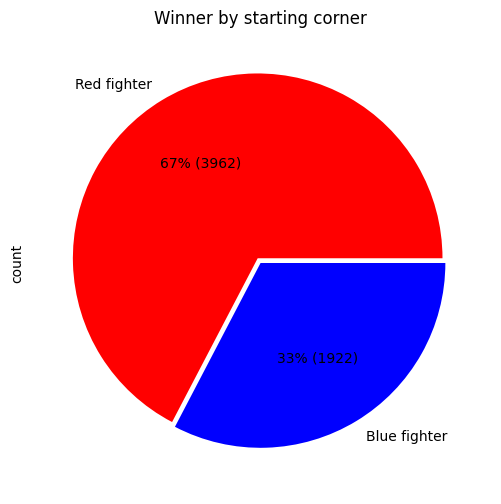

In [39]:
prop_corner = df["winner_color"].value_counts().reset_index()
prop_corner.columns = ["R_fighter", "B_fighter"]

plt.figure(figsize = (8, 6))
colors = ["red", "blue"]
ax = df["winner_color"].value_counts().plot(kind = "pie", labels=["Red fighter", "Blue fighter"], colors=colors, explode = (0.03,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(df):.0f})')

plt.title("Winner by starting corner");

This pie shows that there is a huge scuff towards the fighter from the red corner winning fights, this is simply due to the fact that generally the title-holder, higher ranked fighter or simply betting favourite is placed in this corner. 

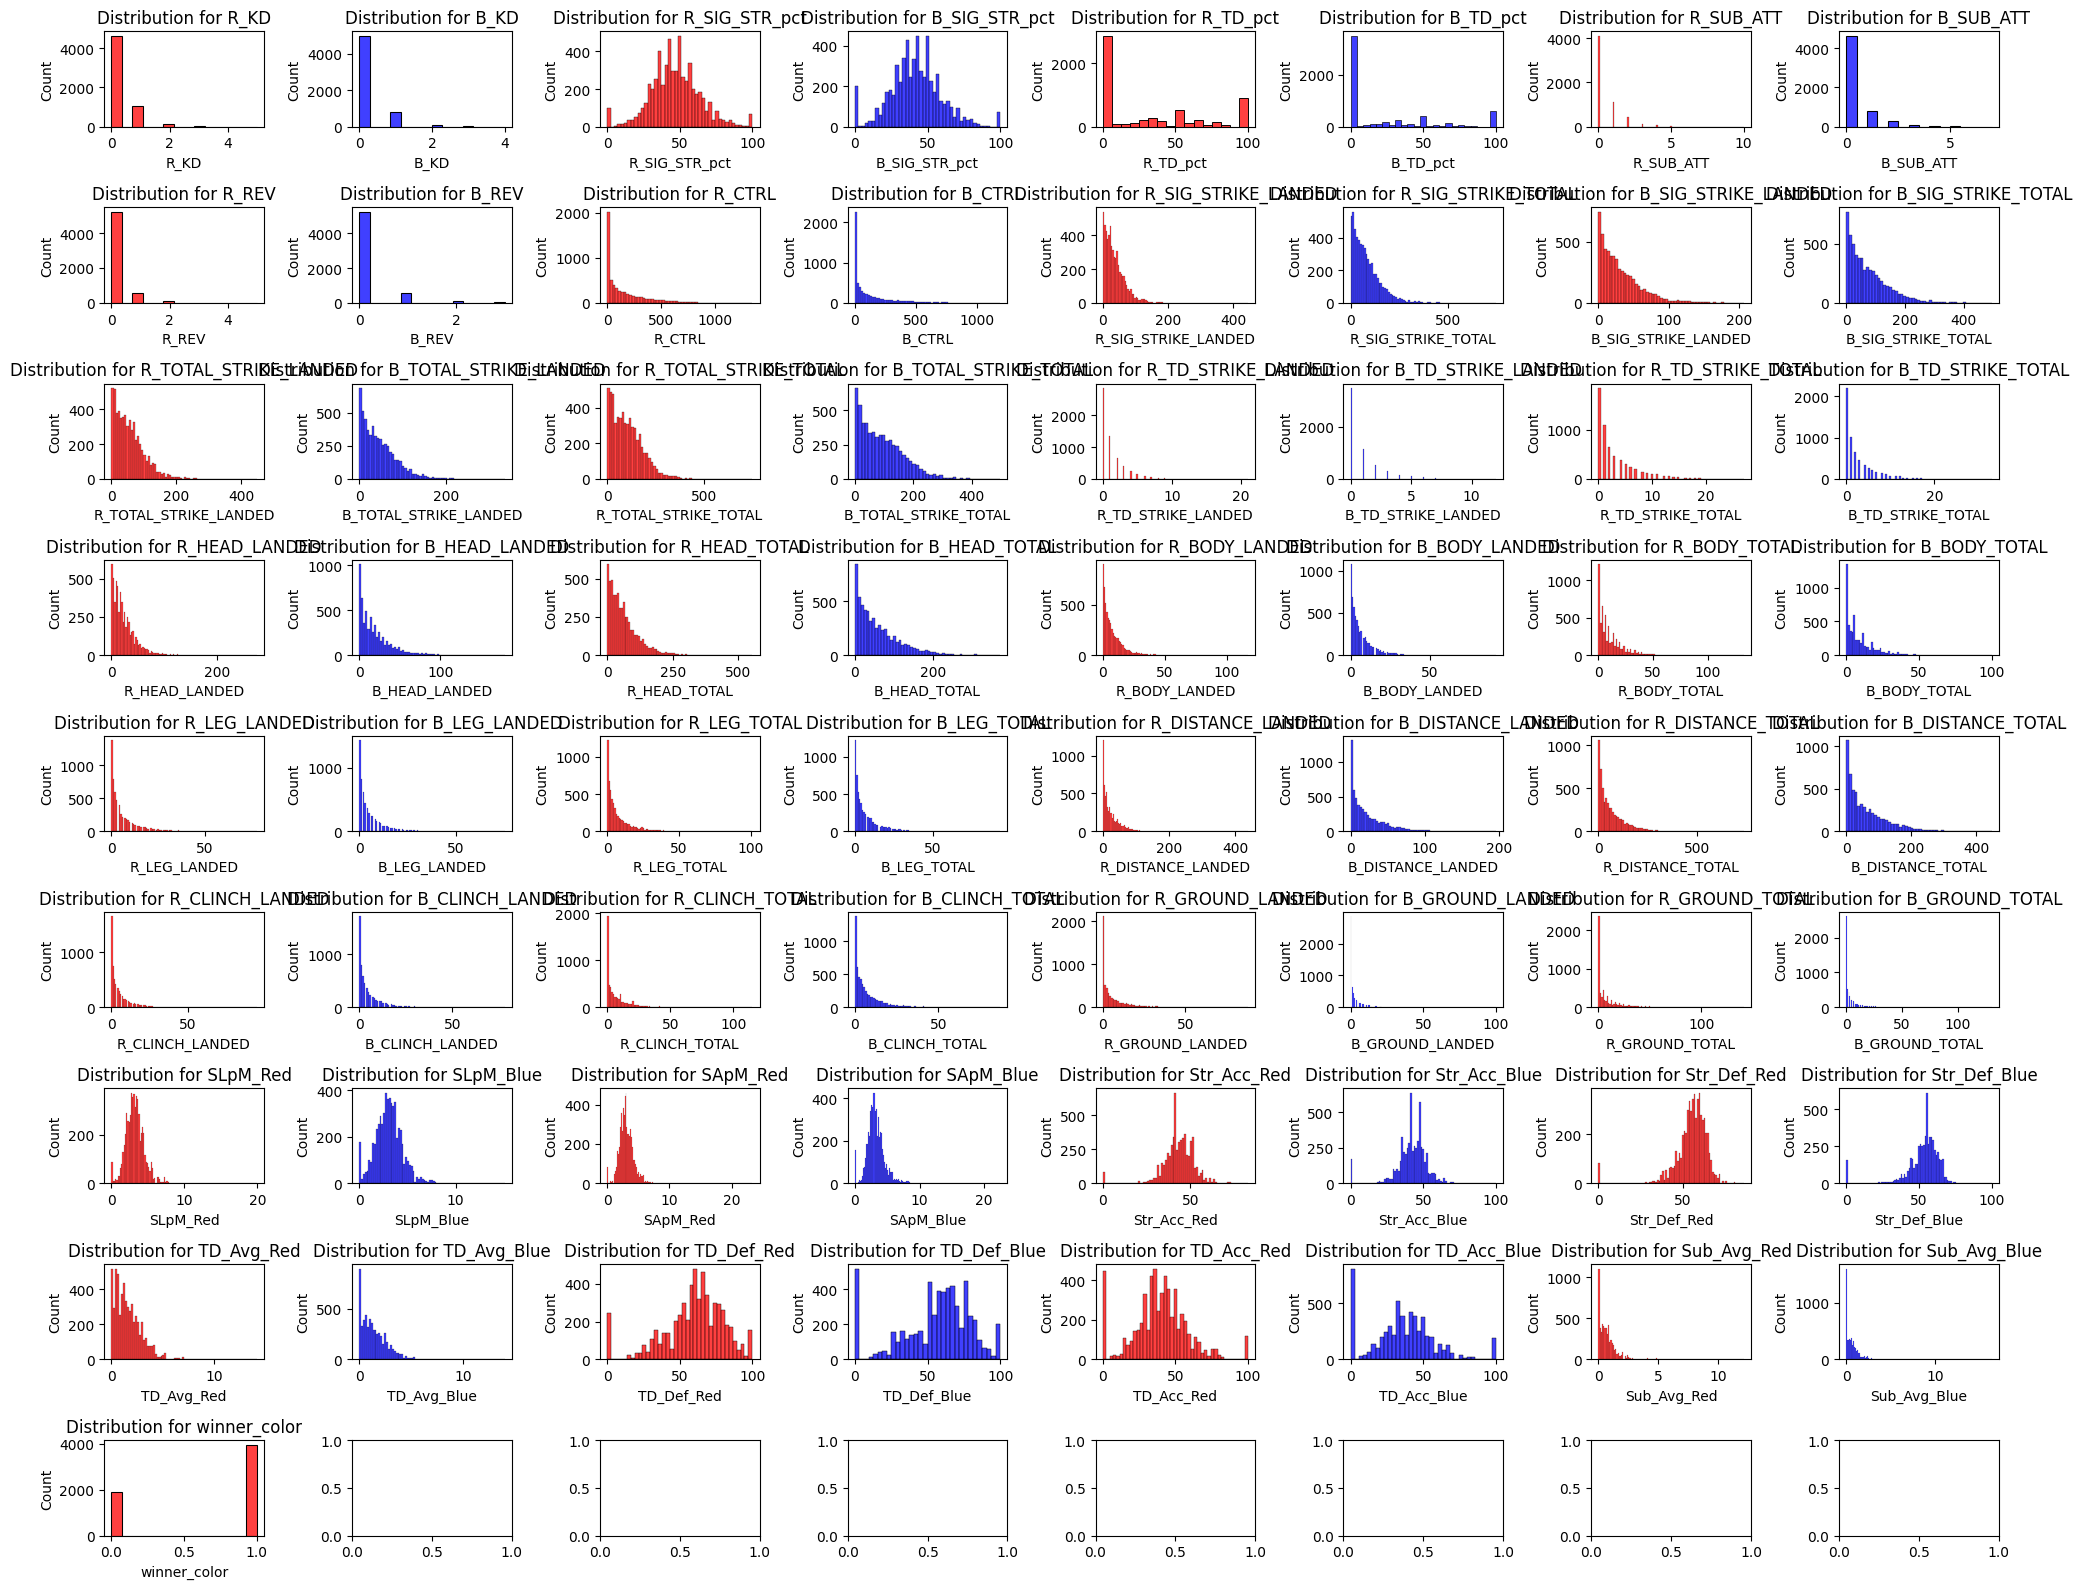

In [40]:
fig, ax = plt.subplots(9, 8, figsize=(20, 16))
ax = ax.flatten()

df_numeric = df[numeric_columns]

for i, col in enumerate(df_numeric.columns):
    if i % 2 == 0:
        color = 'red'
    else:
        color = 'blue'
        
    sns.histplot(data=df_numeric[col], ax=ax[i], color=color)
    ax[i].set_title(f"Distribution for {col}")

plt.tight_layout()

The graphs from all the numerical columns don't necessarily tell us a whole lot, as the are fairly similar as expected when considering professional athletes and top level performers usually have a fairly comparable skillset, and it's also in cases same fighters in different corners.

In [41]:
def skew_kurtosis(data): 
    skewness = st.skew(data)
    kurtosis = st.kurtosis(data,fisher=False)
    excess_kurtosis = st.kurtosis(data) 
    print(f"Skewness: {skewness}")
    print(f"Real kurtosis: {kurtosis}")
    print(f"Excess kurtosis: {excess_kurtosis}")

In [42]:
skew_kurtosis(df_numeric["R_SIG_STRIKE_LANDED"])

Skewness: 1.8572745901815484
Real kurtosis: 11.62209319364198
Excess kurtosis: 8.62209319364198


In [43]:
skew_kurtosis(df_numeric["B_SIG_STRIKE_LANDED"])

Skewness: 1.5013372845245831
Real kurtosis: 5.98256677417164
Excess kurtosis: 2.98256677417164


Only taking what I consider to be the most relevant numbers for trying the skewness and kurtosis, and had no greater expectations that it would end up in and reasonable numbers

Below follows normality tests, these will also most likely not really be able to tell us a whole lot. I'll try some different column for these to see if we can get some more relevant results

In [44]:
def normal_test(alpha, data):
 
    shapiro_test = st.shapiro(data)
    ks_test = st.kstest(data, 'norm')
    ad_test = st.anderson(data, dist='norm')
    dagostino_test = st.normaltest(data)
    lilliefors_test = lilliefors(data, dist='norm')

    test_results = pd.DataFrame({
        'Name of tests': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
        'Test statistics': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
        'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
        'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                    'Yes' if ks_test.pvalue > alpha else 'No',
                    'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                    'Yes' if dagostino_test.pvalue > alpha else 'No',
                    'Yes' if lilliefors_test[1] > alpha else 'No']
    })

    print(test_results);

In [45]:
print(normal_test(0.05, df_numeric["Str_Acc_Red"]))

        Name of tests  Test statistics  p-valeur Normality
0        Shapiro-Wilk         0.899212     0.000        No
1  Kolmogorov-Smirnov         0.985384     0.000        No
2    Anderson-Darling        83.549681       NaN        No
3  D'Agostino-Pearson      1712.898533     0.000        No
4          Lilliefors         0.090616     0.001        No
None


c:\Users\Fredrik\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
print(normal_test(0.05, df_numeric["Str_Acc_Blue"]))

        Name of tests  Test statistics  p-valeur Normality
0        Shapiro-Wilk         0.886629     0.000        No
1  Kolmogorov-Smirnov         0.971108     0.000        No
2    Anderson-Darling       141.633772       NaN        No
3  D'Agostino-Pearson      1547.220538     0.000        No
4          Lilliefors         0.112620     0.001        No
None


c:\Users\Fredrik\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As expected there wasn't much luck in finding any normality, I tried using the columns that appeared to have the most even distribution.

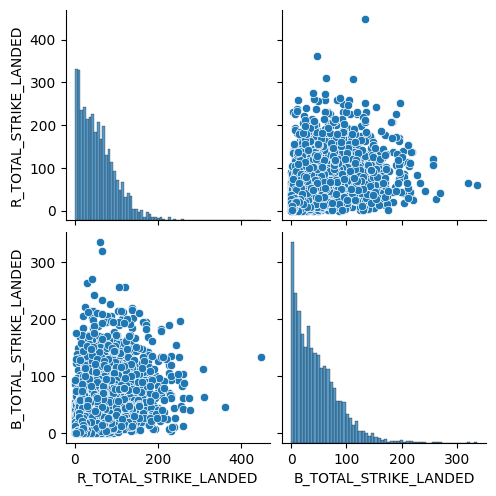

In [47]:
sns.pairplot(df[["R_TOTAL_STRIKE_LANDED", "B_TOTAL_STRIKE_LANDED"]]);

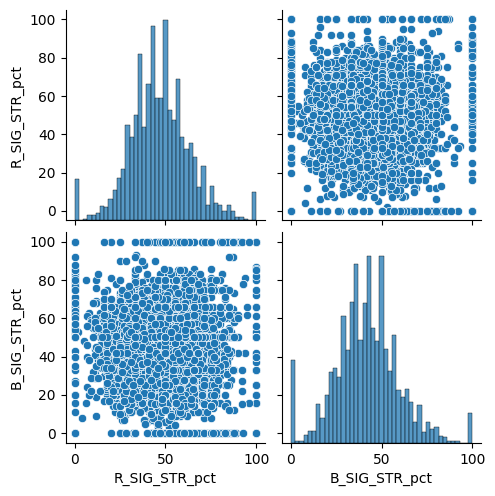

In [48]:
sns.pairplot(df_numeric[["R_SIG_STR_pct","B_SIG_STR_pct"]]);

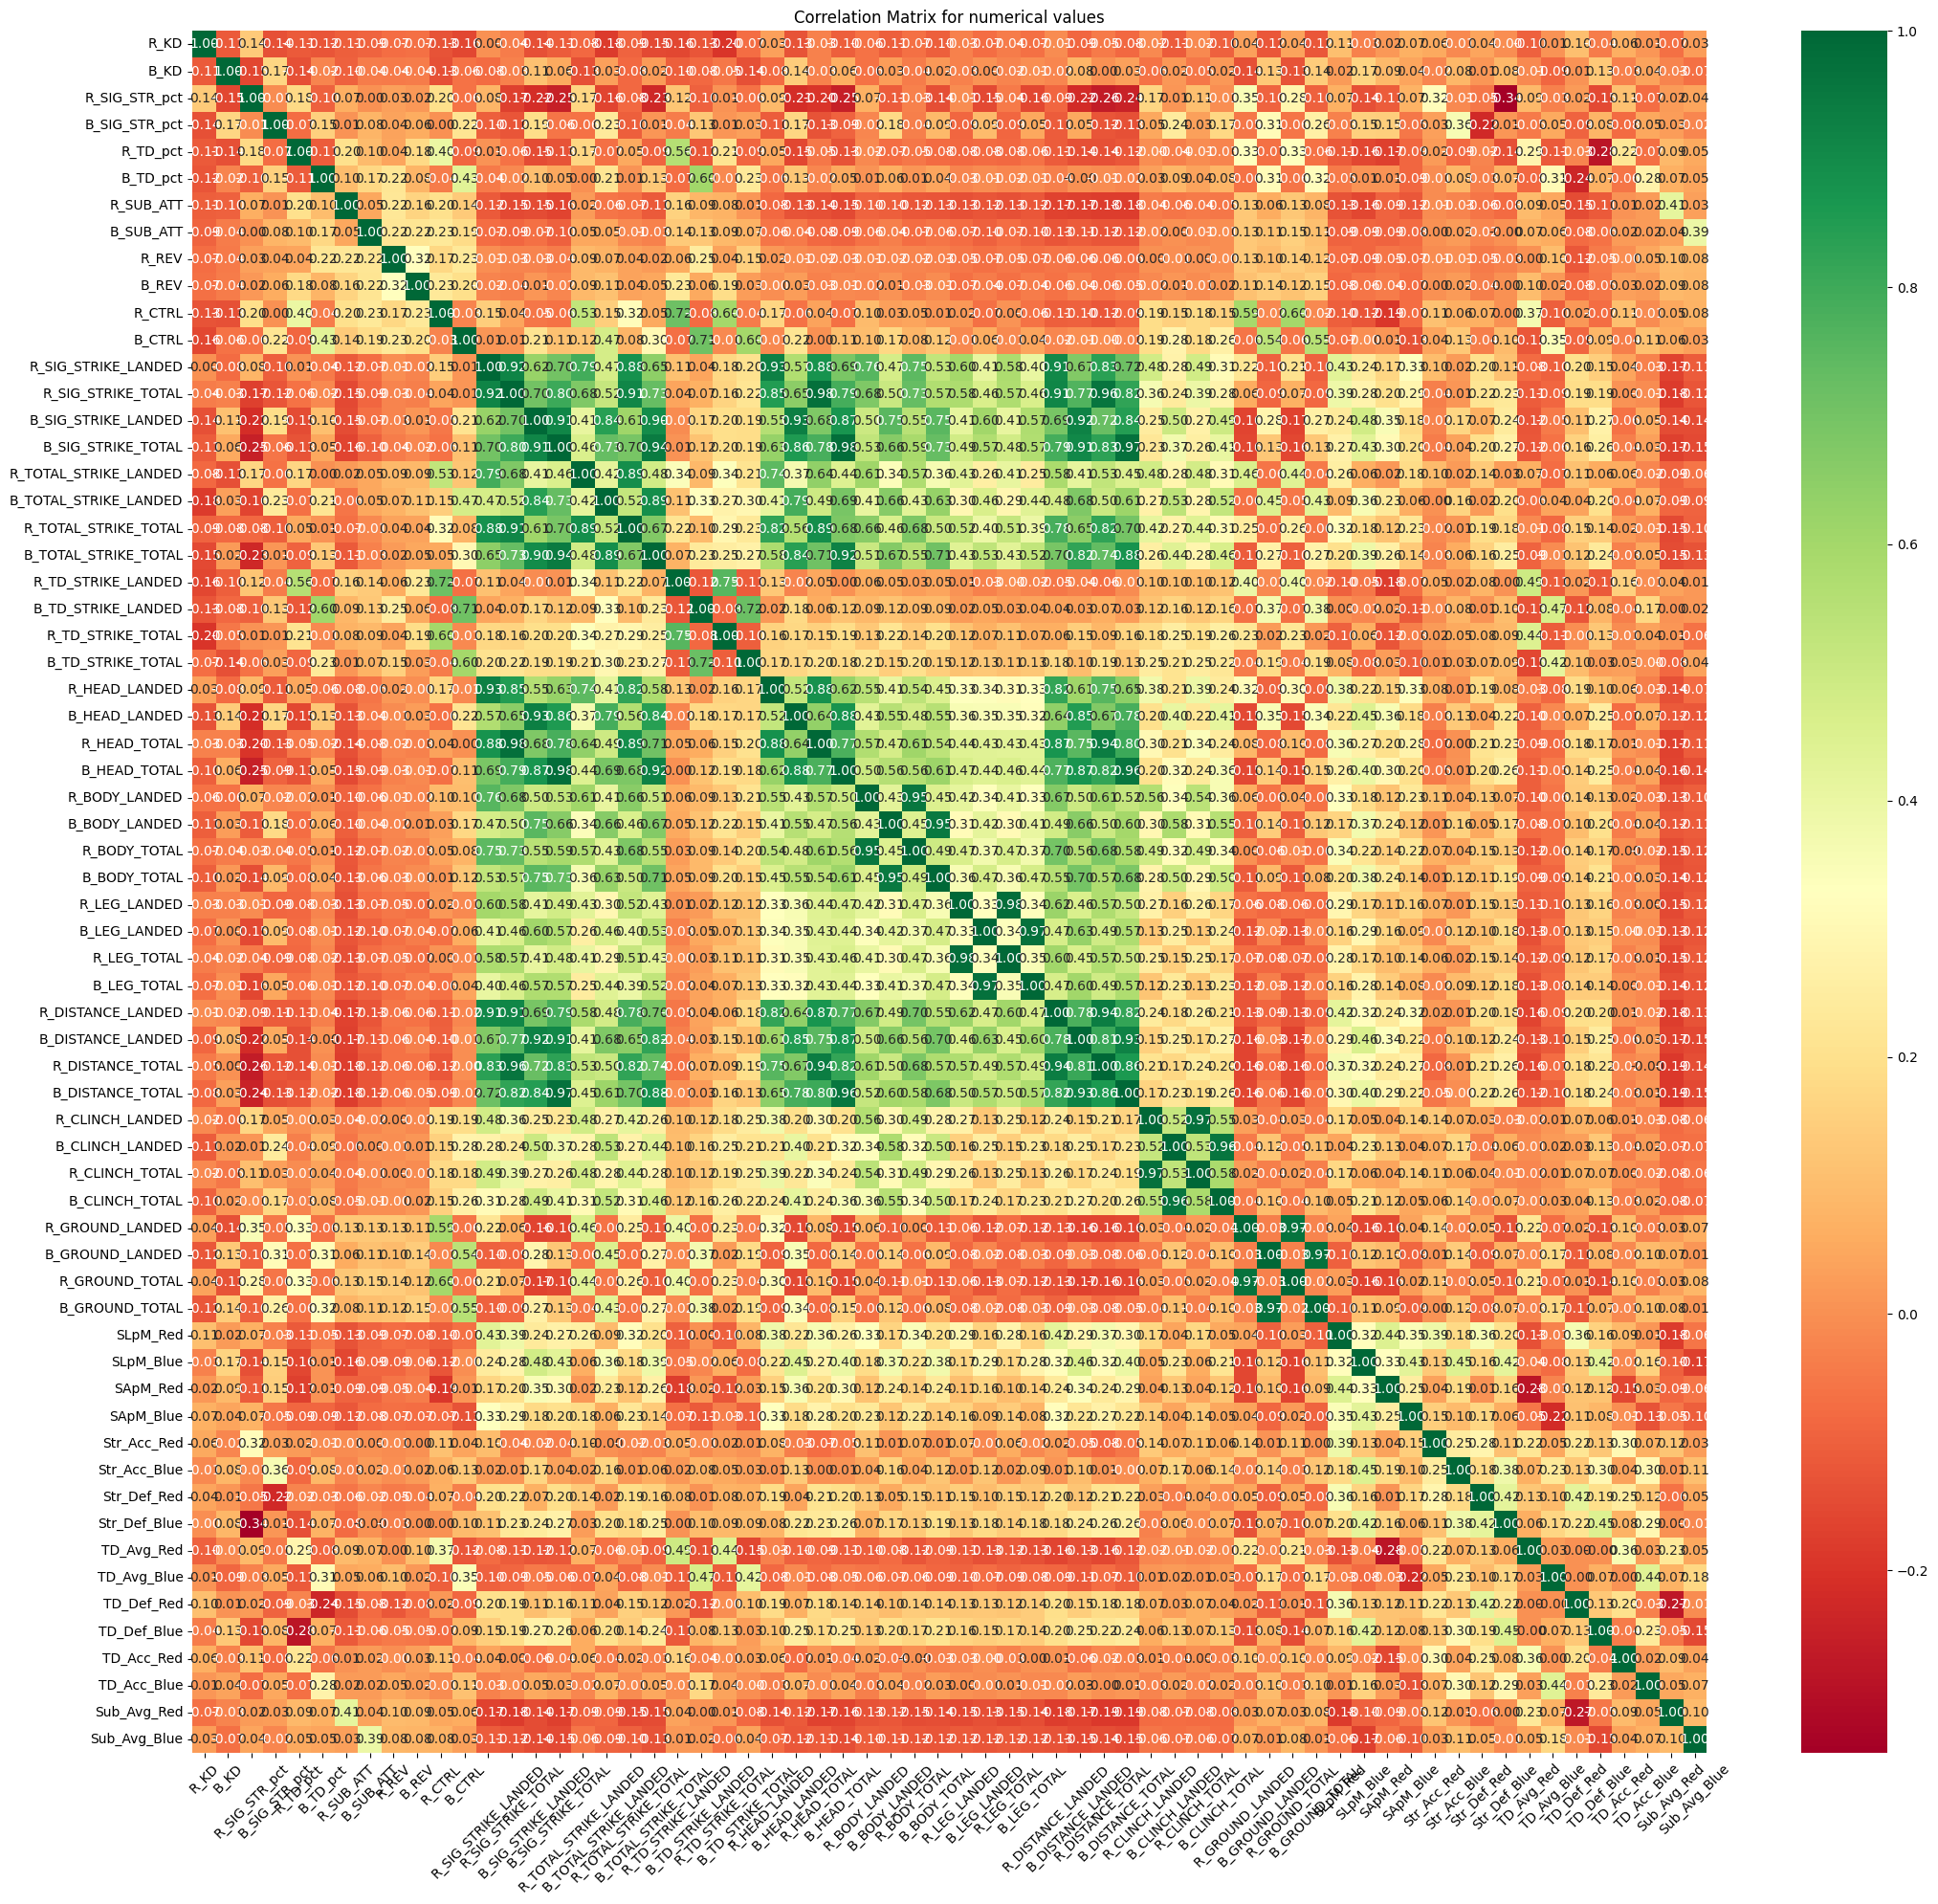

In [49]:
fig, ax = plt.subplots(figsize=(22, 20))
corr_matrix = df_numeric[[
    'R_KD', 'B_KD', 'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct',
    'R_SUB_ATT', 'B_SUB_ATT', 'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL',
    'R_SIG_STRIKE_LANDED', 'R_SIG_STRIKE_TOTAL', 'B_SIG_STRIKE_LANDED', 'B_SIG_STRIKE_TOTAL',
    'R_TOTAL_STRIKE_LANDED', 'B_TOTAL_STRIKE_LANDED', 'R_TOTAL_STRIKE_TOTAL', 'B_TOTAL_STRIKE_TOTAL',
    'R_TD_STRIKE_LANDED', 'B_TD_STRIKE_LANDED', 'R_TD_STRIKE_TOTAL', 'B_TD_STRIKE_TOTAL',
    'R_HEAD_LANDED', 'B_HEAD_LANDED', 'R_HEAD_TOTAL', 'B_HEAD_TOTAL',
    'R_BODY_LANDED', 'B_BODY_LANDED', 'R_BODY_TOTAL', 'B_BODY_TOTAL',
    'R_LEG_LANDED', 'B_LEG_LANDED', 'R_LEG_TOTAL', 'B_LEG_TOTAL',
    'R_DISTANCE_LANDED', 'B_DISTANCE_LANDED', 'R_DISTANCE_TOTAL', 'B_DISTANCE_TOTAL',
    'R_CLINCH_LANDED', 'B_CLINCH_LANDED', 'R_CLINCH_TOTAL', 'B_CLINCH_TOTAL',
    'R_GROUND_LANDED', 'B_GROUND_LANDED', 'R_GROUND_TOTAL', 'B_GROUND_TOTAL',
    'SLpM_Red', 'SLpM_Blue', 'SApM_Red', 'SApM_Blue',
    'Str_Acc_Red', 'Str_Acc_Blue', 'Str_Def_Red', 'Str_Def_Blue',
    'TD_Avg_Red', 'TD_Avg_Blue', 'TD_Def_Red', 'TD_Def_Blue',
    'TD_Acc_Red', 'TD_Acc_Blue', 'Sub_Avg_Red', 'Sub_Avg_Blue',
]].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True, ax=ax)

plt.xticks(rotation=45)

plt.title('Correlation Matrix for numerical values')
plt.tight_layout()

plt.show()

The correlation matrix is also mostly offering what can be expected, due to the many of the data columns are directly correlated to one another, and most of the correlation points are due to having a high amount of attempted strikes or control time, generally will lead you to have a large amount of landed strikes, or if your opponent have a lot of attempted strikes, you are more likely to have defended a significant amount of strikes.

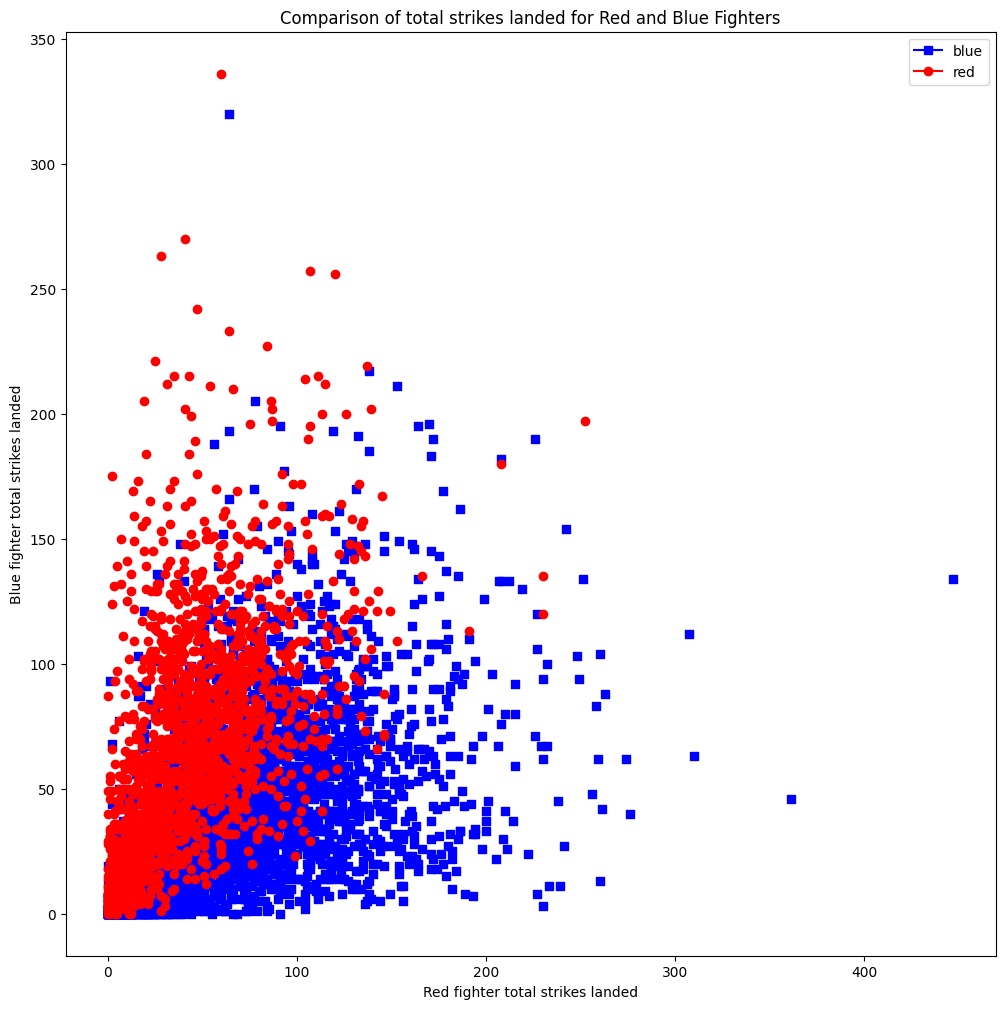

In [50]:
marker_styles = {
    "0": "o",
    "1": "s",
    "2": "D"
}

colors = {
    "0": "red",
    "1": "blue",
    "2": "green"
}

df["winner_color"] = df["winner_color"].astype(str)
plt.figure(figsize = (12, 12))

for winner_color in df["winner_color"].unique():
    marker = marker_styles[winner_color]
    color = colors[winner_color]
    data = df[df["winner_color"] == winner_color]
    plt.scatter(data["R_TOTAL_STRIKE_LANDED"], data["B_TOTAL_STRIKE_LANDED"], marker=marker, color=color, label=winner_color)

plt.xlabel("Red fighter total strikes landed")
plt.ylabel("Blue fighter total strikes landed")
plt.title("Comparison of total strikes landed for Red and Blue Fighters")

legend_labels = {"0": "red", "1": "blue"} 
custom_legend = [plt.Line2D([], [], marker=marker_styles[key], color=colors[key], label=legend_labels.get(key, key)) for key in df["winner_color"].unique()]
plt.legend(handles=custom_legend)

plt.show()

Scatterplot to try to get a general idea regarding landed strikes, there are some outliers in fight that have been fairly onesided and gone the full clock

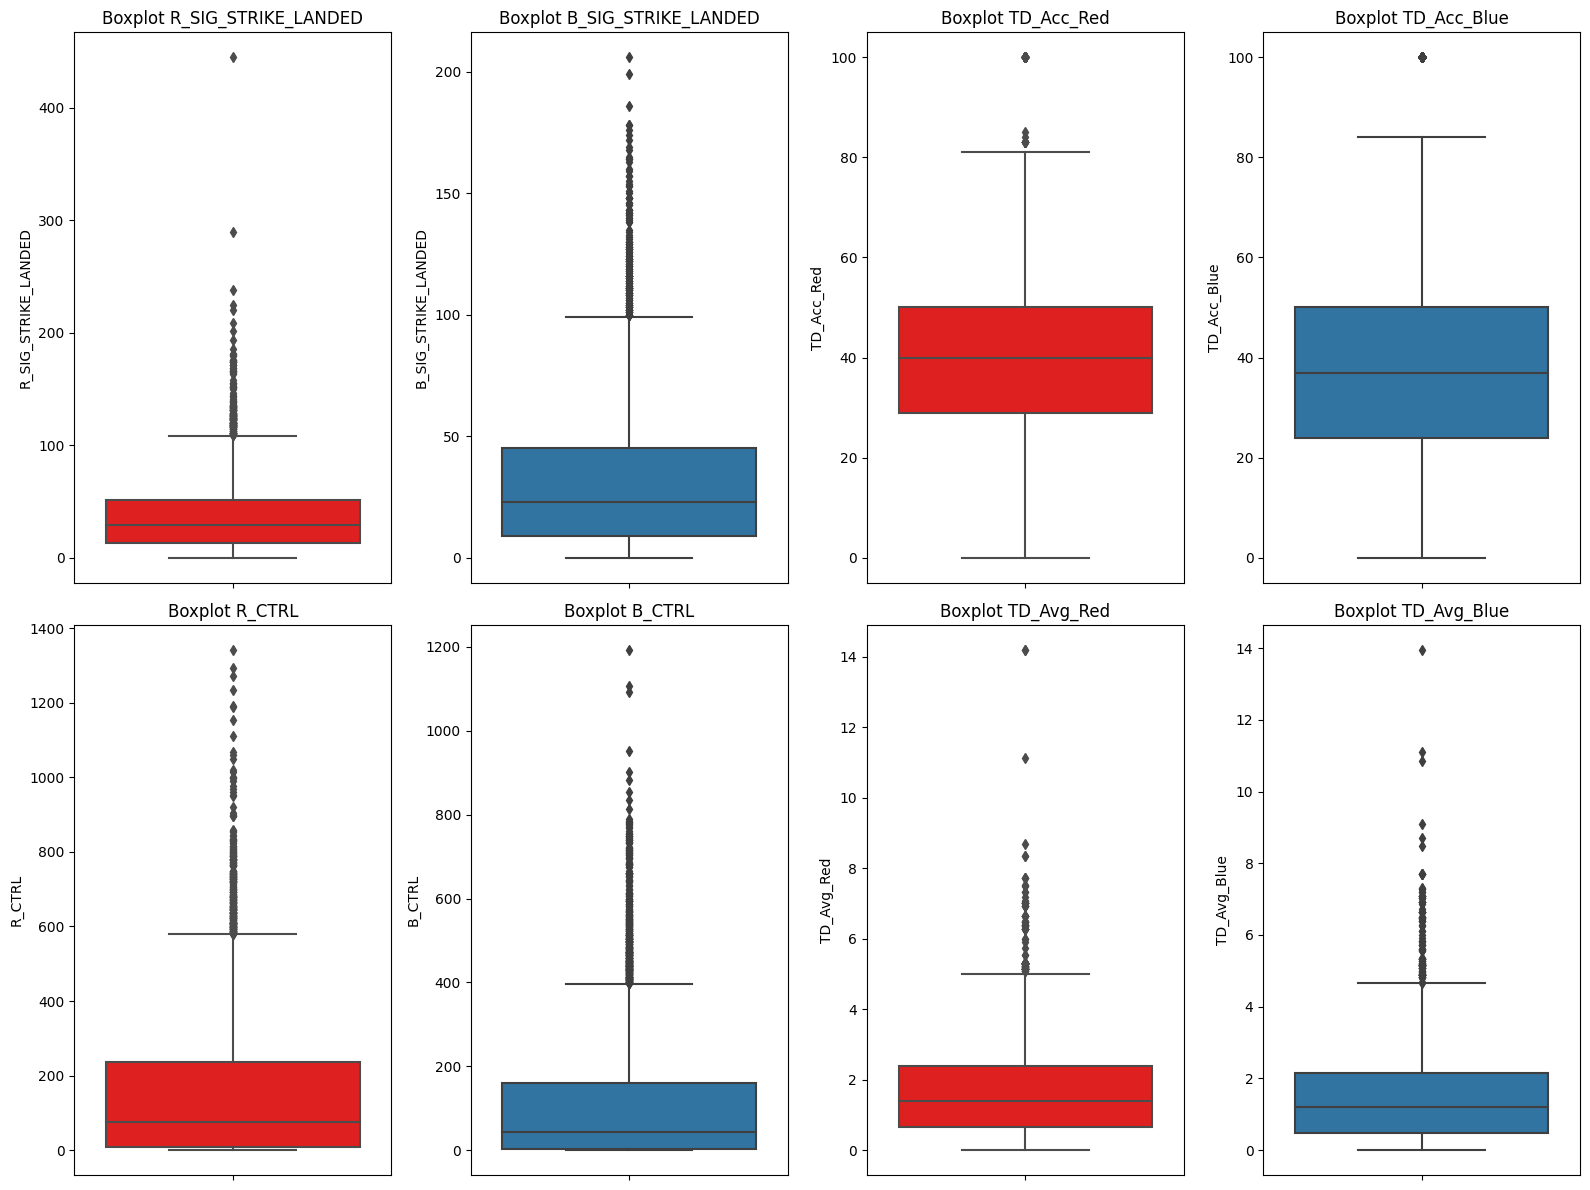

In [51]:
fig, ax = plt.subplots(2, 4, figsize=(16, 12))

df_selc_cols = df[["R_SIG_STRIKE_LANDED", "B_SIG_STRIKE_LANDED", "TD_Acc_Red", "TD_Acc_Blue", "R_CTRL", "B_CTRL", "TD_Avg_Red", "TD_Avg_Blue"]]
columns = df_selc_cols.columns

red_columns = ["R_SIG_STRIKE_LANDED", "TD_Acc_Red", "R_CTRL", "TD_Avg_Red"]

for i in range(2):
    for j in range(4):
        if columns[i*4 + j] in red_columns:
            sns.boxplot(y=columns[i*4 + j], data=df_selc_cols, ax=ax[i, j], color="red")
        else:
            sns.boxplot(y=columns[i*4 + j], data=df_selc_cols, ax=ax[i, j])
        ax[i, j].set_title(f"Boxplot {columns[i*4 + j]}")

plt.tight_layout()

These boxplots further show the general leaning for the fighter out of the red corner, especially on the striking department. The takedown accuracy is a bit more even, and maybe can point to that fighters with a heavier emphasis on wrestling is fighting out of that corner, and that in general due to the numbers we've already observed, that strikers are generally more succesful in the average fight in UFC.

### Statistics

In [52]:
from scipy.stats import chi2_contingency

def tests_varqual(data1, data2):
    plt.figure(figsize=(15, 10))
    sns.countplot(data=df, x=data1, hue=data2)
    plt.xlabel(f'{data1.name}')
    plt.title(f'Relationship between winning and the variable {data1.name}')
    plt.show()
    
    
    contingency_table = pd.crosstab(data1, data2)
    #print("Contingency Matrix (Observed Frequencies)")
    #print(contingency_table)
    print("\n")
    
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    #print("Expected frequency :\n", expected_freq)
    #print("\n")
    print("Chi-square statistics :", chi2_stat)
    print("P-value :", p_value)
    print("Degrees of freedom :", dof)
    
    
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))

    print("Cramér-V coefficient :", cramer_v)
    #print("\n")
    
    n = df.shape[0]
    min_dim = min(contingency_table.shape) - 1
    
    chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))

    print("Tschuprow's T coefficient :", tschuprow_t)
    print("P-value :", p_value)

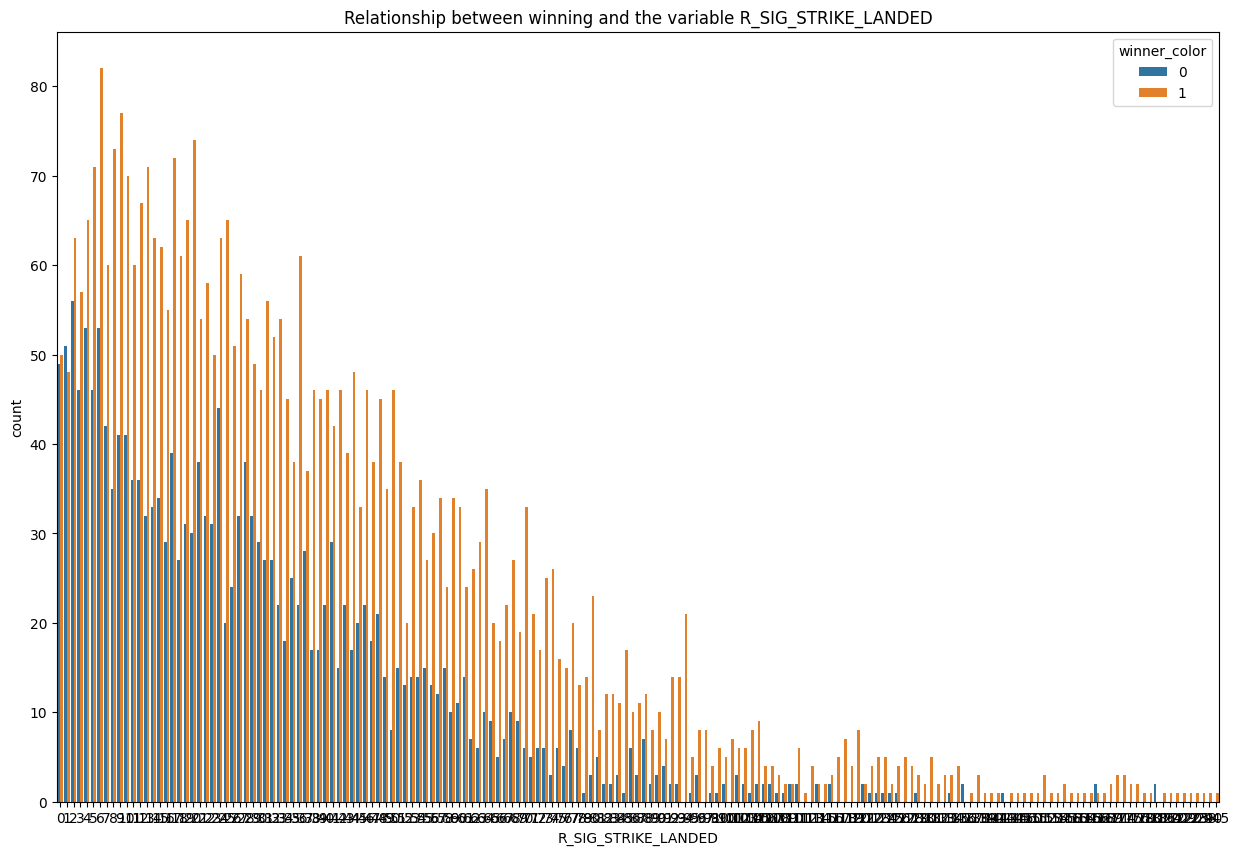



Chi-square statistics : 263.58634261597103
P-value : 1.3577126354311272e-05
Degrees of freedom : 174
Cramér-V coefficient : 0.2116533369614142
Tschuprow's T coefficient : 0.2116533369614142
P-value : 1.3577126354311272e-05


In [53]:
tests_varqual(df_numeric["R_SIG_STRIKE_LANDED"], df_numeric["winner_color"])

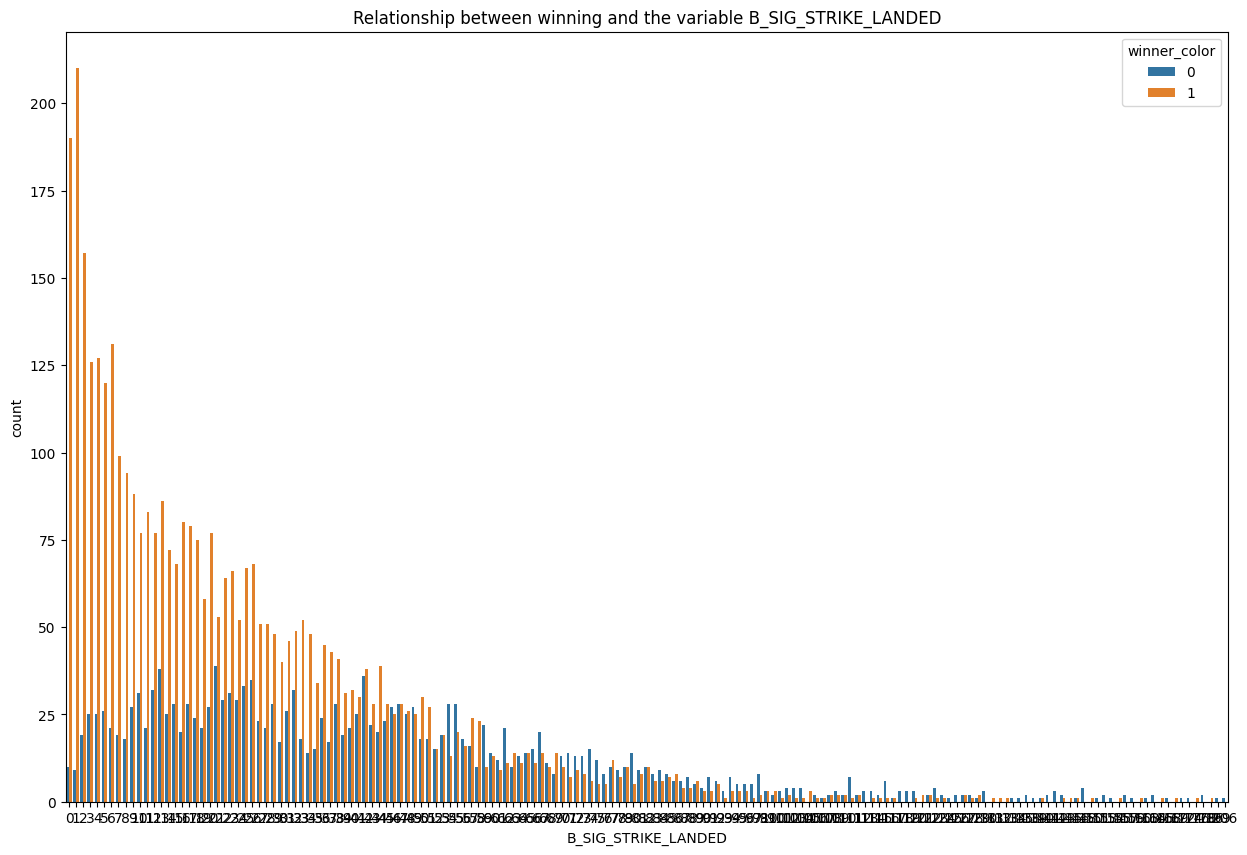



Chi-square statistics : 847.1576158542427
P-value : 1.4203542620898679e-92
Degrees of freedom : 164
Cramér-V coefficient : 0.37944232932089
Tschuprow's T coefficient : 0.37944232932089
P-value : 1.4203542620898679e-92


In [54]:
tests_varqual(df_numeric["B_SIG_STRIKE_LANDED"], df_numeric["winner_color"])

I commented out parts of the print to save you from endless scrolling. 

These results suggest a strong correlation between the landed significant strikes and who will win the bout, which should not be very surprising due to the limited selection of variables that has been taken into account.

In [55]:
def tests_varquals(data1, data2):
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=data1, hue=data2)
    plt.xlabel(f'{data1.name}')
    plt.title(f'Relationship between winning and the variable {data1.name}')
    plt.show()
    
    
    contingency_table = pd.crosstab(data1, data2)
    #print("Contingency Matrix (Observed Frequencies)")
    #print(contingency_table)
    print("\n")
    
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    
    #print("Expected frequency :\n", expected_freq)
    #print("\n")
    print("Chi-square statistics :", chi2_stat)
    print("P-value :", p_value)
    print("Degrees of freedom :", dof)
    
    
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))

    print("Cramér-V coefficient :", cramer_v)
    #print("\n")
    
    n = df.shape[0]
    min_dim = min(contingency_table.shape) - 1
    
    chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))

    print("Tschuprow's T coefficient :", tschuprow_t)
    print("P-value :", p_value)

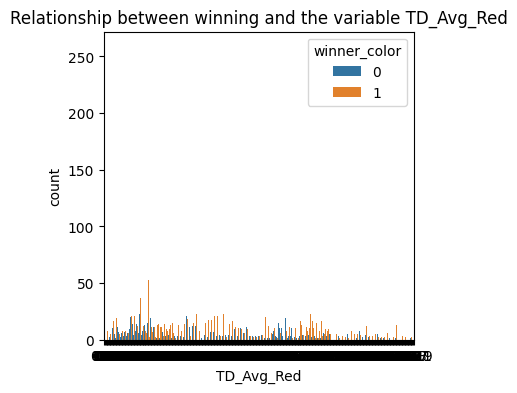



Chi-square statistics : 523.5305327367676
P-value : 0.0001779808511420646
Degrees of freedom : 413
Cramér-V coefficient : 0.29828723990066014
Tschuprow's T coefficient : 0.29828723990066014
P-value : 0.0001779808511420646


In [56]:
tests_varquals(df_numeric["TD_Avg_Red"], df_numeric["winner_color"])

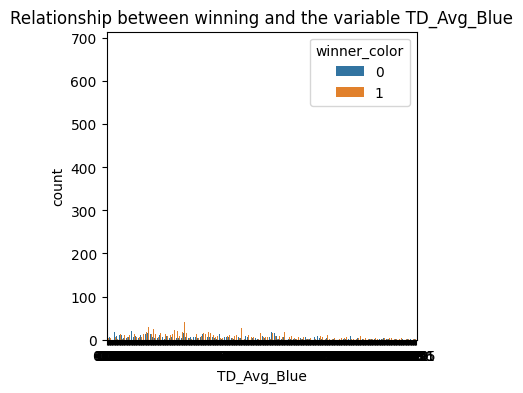



Chi-square statistics : 719.0863523756518
P-value : 6.91869083614666e-16
Degrees of freedom : 439
Cramér-V coefficient : 0.3495861281212226
Tschuprow's T coefficient : 0.3495861281212226
P-value : 6.91869083614666e-16


In [57]:
tests_varquals(df_numeric["TD_Avg_Blue"], df_numeric["winner_color"])

As for the average takedowns compared to winning the bout, there is still strong correlation, which is also not very surprising. All in all, this must be fairly usual for the entire set, as you generally will have a good statistic for winning the bout, and this leads me to not try and make any greater chases in the variable quality department.

## ANOVA

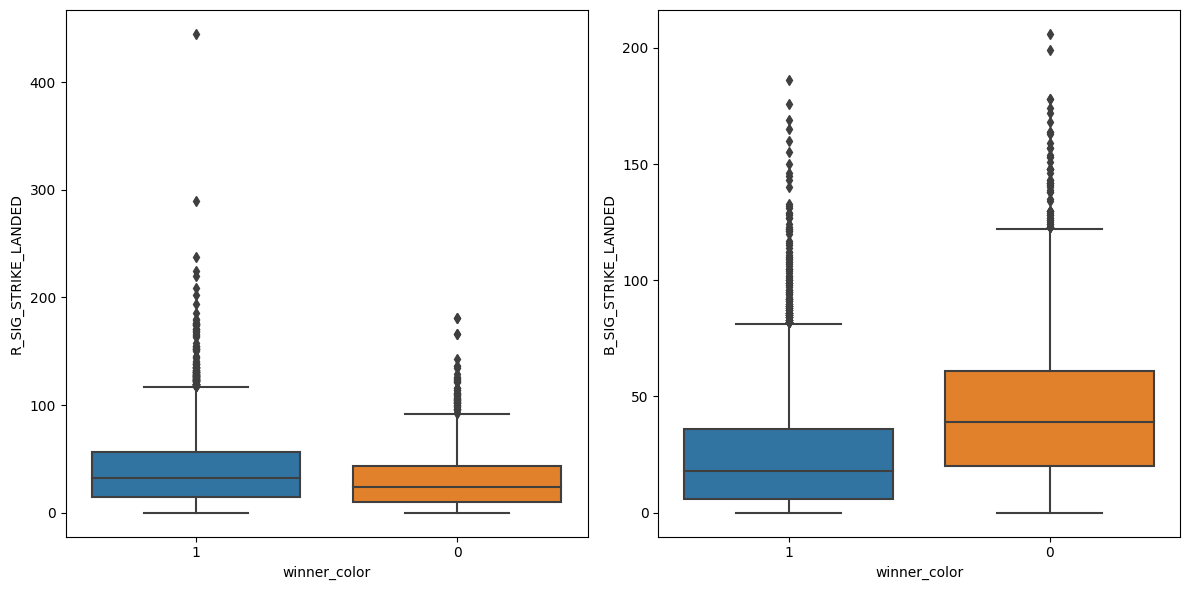

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

for i, col in enumerate(df_numeric[["R_SIG_STRIKE_LANDED", "B_SIG_STRIKE_LANDED"]]):
    sns.boxplot(x = "winner_color", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

Here the discrepancy between the two corners is very appearnt, as the fighters in the red corner has a vastly superiour compared to fighters in the blue.

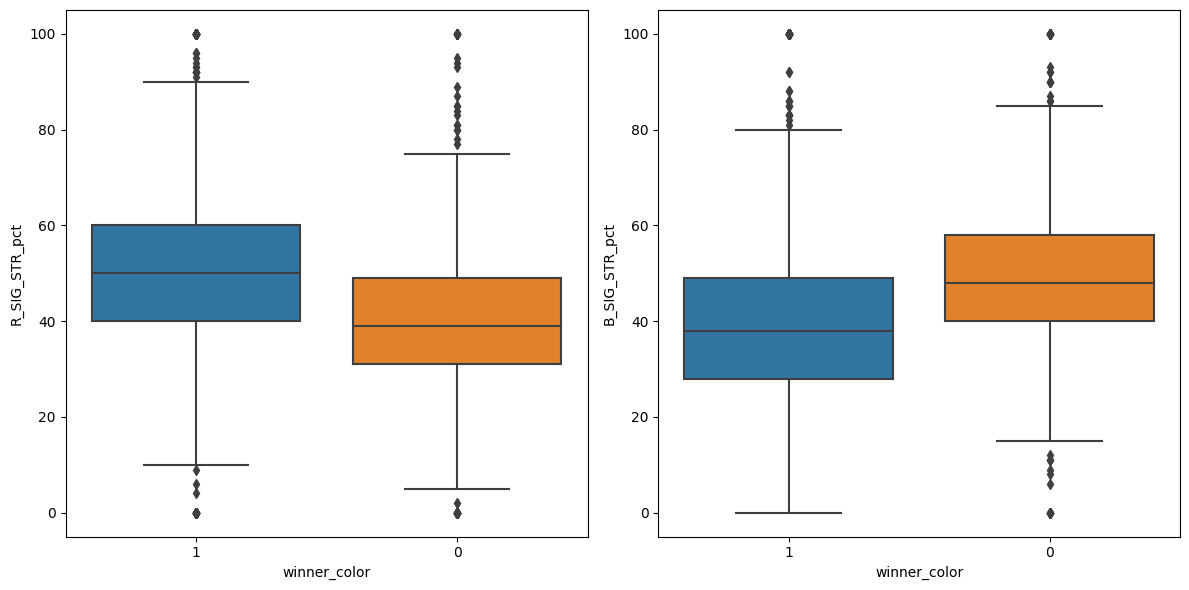

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

for i, col in enumerate(df_numeric[["R_SIG_STR_pct", "B_SIG_STR_pct"]]):
    sns.boxplot(x = "winner_color", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

The percentage of strikes landed is quite interesting however, as it seems that losing fighters from the blue corner seem to have a very high percentage of landed strikes in comparision to the winning fighters from the blue corner. 
This might be down to the fact that there is a larger amount of submission wins from the blue corner.

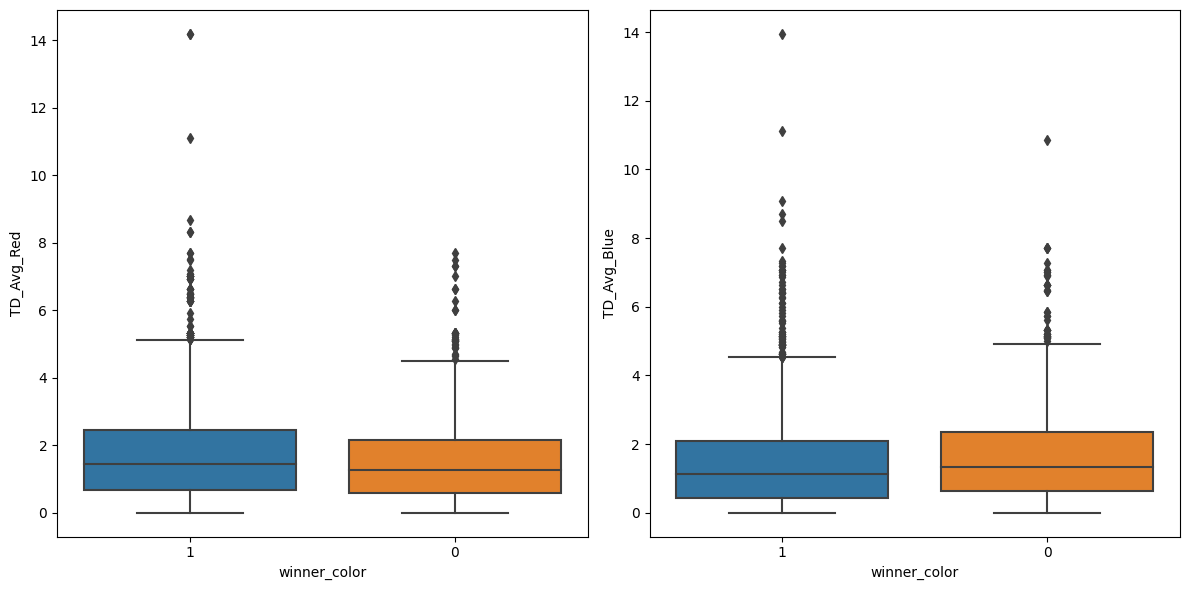

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

for i, col in enumerate(df_numeric[["TD_Avg_Red", "TD_Avg_Blue"]]):
    sns.boxplot(x = "winner_color", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

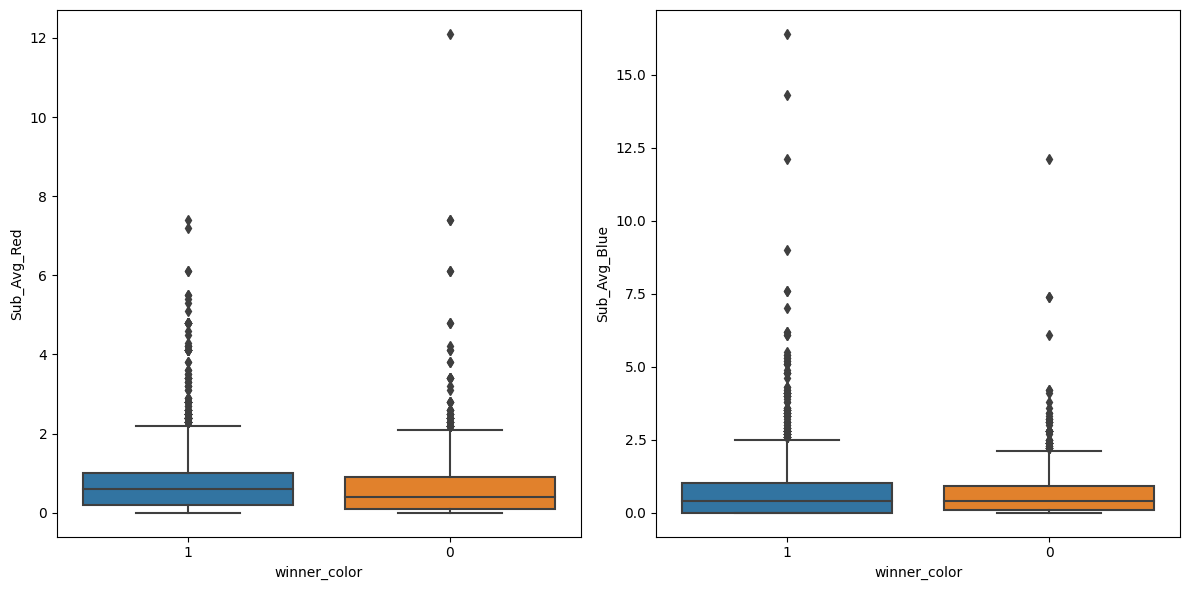

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

for i, col in enumerate(df_numeric[["Sub_Avg_Red", "Sub_Avg_Blue"]]):
    sns.boxplot(x = "winner_color", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

There does seem to be some relevance in the thesis that fighers from the generally losing blue corner have a greater success rate when  wrestling and attempting submissions, if ever so slight, but I think that when taking the overwhelming winrate of the red corner into account, it should be relevant.

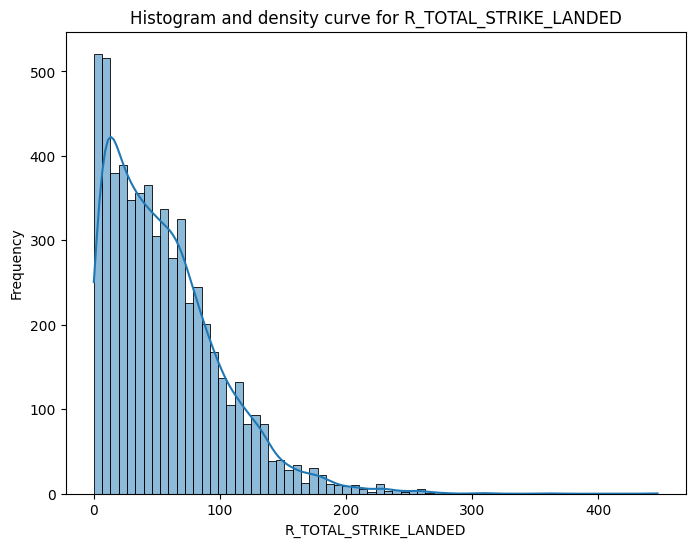

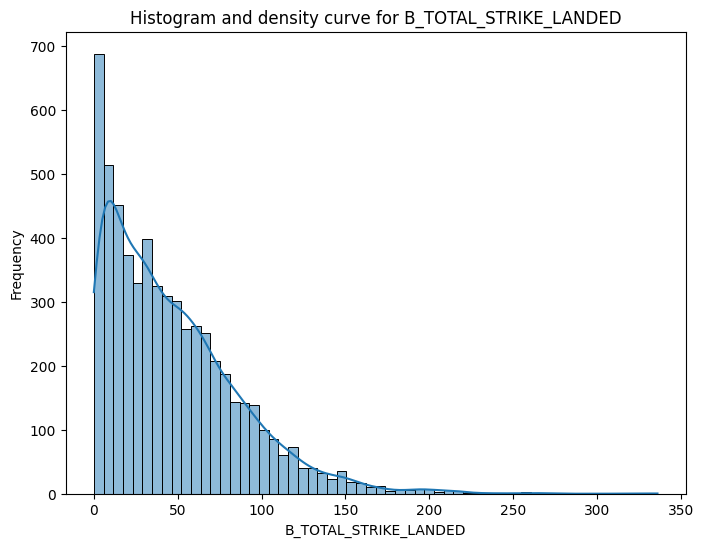

P-value of normality (Shapiro-Wilk) for R_TOTAL_STRIKE_LANDED: 0.0
P-value of normality (Shapiro-Wilk) for B_TOTAL_STRIKE_LANDED: 0.0


c:\Users\Fredrik\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

var1 = "winner_color"
var2 = "R_TOTAL_STRIKE_LANDED"
var3 = "B_TOTAL_STRIKE_LANDED"

for var in [var2, var3]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_numeric[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f"Histogram and density curve for {var}")
    plt.show()

for var in [var2, var3]:
    _, p_value = shapiro(df[var])
    print(f"P-value of normality (Shapiro-Wilk) for {var}:", p_value)

In [63]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon, levene


win_red = df[df['winner_color'] == '1']['R_SIG_STR_pct']
win_blue = df[df['winner_color'] == '1']['B_SIG_STR_pct']

t_stat, t_p_value = ttest_ind(win_red, win_blue)
print("Student's t-statistic :", t_stat)
print("P-value (t-test) :", t_p_value)

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(win_red, win_blue)
print("Mann-Whitney U test :", mann_whitney_stat)
print("P-value (Mann-Whitney) :", mann_whitney_p_value)

anova_stat, anova_p_value = f_oneway(win_red, win_blue)
print("ANOVA F statistic :", anova_stat)
print("P-value (ANOVA) :", anova_p_value)

levene_stat, levene_p_value = levene(win_red, win_blue)
print("Levene's W Statistic :", levene_stat)
print("P-value (Levene) :", levene_p_value)

kruskal_stat, kruskal_p_value = kruskal(win_red, win_blue)
print("Kruskal-Wallis H statistic :", kruskal_stat)
print("P-value (Kruskal-Wallis) :", kruskal_p_value)

Student's t-statistic : 31.88632397847052
P-value (t-test) : 5.057271131197255e-210
Mann-Whitney U test : 11172931.0
P-value (Mann-Whitney) : 6.368497941199899e-234
ANOVA F statistic : 1016.7376568599847
P-value (ANOVA) : 5.057271131224464e-210
Levene's W Statistic : 15.046566007364437
P-value (Levene) : 0.00010574018743545392
Kruskal-Wallis H statistic : 1066.4818431971714
P-value (Kruskal-Wallis) : 6.367475487779948e-234


All of the above tests additionally claim what could be spotted in the boxplots above, and describes weak correlation, and I did try doing this with other columns aswell, but with fairly simlar results that claim weak correlation, even with a column for winners with percentage based values.

In [64]:
win_red_takedown = df[df['winner_color'] == '1']['R_CTRL']
win_blue_takedown = df[df['winner_color'] == '1']['B_CTRL']

t_stat, t_p_value = ttest_ind(win_red_takedown, win_blue_takedown)
print("Student's t-statistic :", t_stat)
print("P-value (t-test) :", t_p_value)

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(win_red_takedown, win_blue_takedown)
print("Mann-Whitney U test :", mann_whitney_stat)
print("P-value (Mann-Whitney) :", mann_whitney_p_value)

anova_stat, anova_p_value = f_oneway(win_red_takedown, win_blue_takedown)
print("ANOVA F statistic :", anova_stat)
print("P-value (ANOVA) :", anova_p_value)

levene_stat, levene_p_value = levene(win_red_takedown, win_blue_takedown)
print("Levene's W Statistic :", levene_stat)
print("P-value (Levene) :", levene_p_value)

kruskal_stat, kruskal_p_value = kruskal(win_red_takedown, win_blue_takedown)
print("Kruskal-Wallis H statistic :", kruskal_stat)
print("P-value (Kruskal-Wallis) :", kruskal_p_value)

Student's t-statistic : 28.309318017939674
P-value (t-test) : 4.958222127708155e-168
Mann-Whitney U test : 10564590.5
P-value (Mann-Whitney) : 8.219225497171062e-158
ANOVA F statistic : 801.4174866408435
P-value (ANOVA) : 4.958222127739515e-168
Levene's W Statistic : 762.3828403851925
P-value (Levene) : 2.630238166093866e-160
Kruskal-Wallis H statistic : 716.3756320461823
P-value (Kruskal-Wallis) : 8.218140050772985e-158


In [65]:
win_red_sub = df[df['winner_color'] == '1']['R_SUB_ATT']
win_blue_sub = df[df['winner_color'] == '1']['B_SUB_ATT']

t_stat, t_p_value = ttest_ind(win_red_sub, win_blue_sub)
print("Student's t-statistic :", t_stat)
print("P-value (t-test) :", t_p_value)

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(win_red_sub, win_blue_sub)
print("Mann-Whitney U test :", mann_whitney_stat)
print("P-value (Mann-Whitney) :", mann_whitney_p_value)

anova_stat, anova_p_value = f_oneway(win_red_sub, win_blue_sub)
print("ANOVA F statistic :", anova_stat)
print("P-value (ANOVA) :", anova_p_value)

levene_stat, levene_p_value = levene(win_red_sub, win_blue_sub)
print("Levene's W Statistic :", levene_stat)
print("P-value (Levene) :", levene_p_value)

kruskal_stat, kruskal_p_value = kruskal(win_red_sub, win_blue_sub)
print("Kruskal-Wallis H statistic :", kruskal_stat)
print("P-value (Kruskal-Wallis) :", kruskal_p_value)

Student's t-statistic : 15.928316076286485
P-value (t-test) : 2.992386524668855e-56
Mann-Whitney U test : 9411060.5
P-value (Mann-Whitney) : 9.424150337628977e-86
ANOVA F statistic : 253.71125302608644
P-value (ANOVA) : 2.9923865246870682e-56
Levene's W Statistic : 253.71125302608652
P-value (Levene) : 2.9923865246870682e-56
Kruskal-Wallis H statistic : 385.1479621831258
P-value (Kruskal-Wallis) : 9.42298578760451e-86


All these above have a very weak correlation suprisingly, which I can only point additionally to the red corner advantage.

### Data Split and Scaling

In [66]:
y = df["winner_color"]
X = df.drop(["winner_color"],axis = 1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training data shape {X_train.shape} and {y_train.shape}')
print("\n")
print(f"Test data shape {X_test.shape} and {y_test.shape}")

Training data shape (4707, 69) and (4707,)


Test data shape (1177, 69) and (1177,)


In [67]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1, random_state=42)

X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

bankdata_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)

In [68]:
print(f'{X_train_oversampled.shape} et {y_train_oversampled.shape}')

(6394, 69) et (6394,)


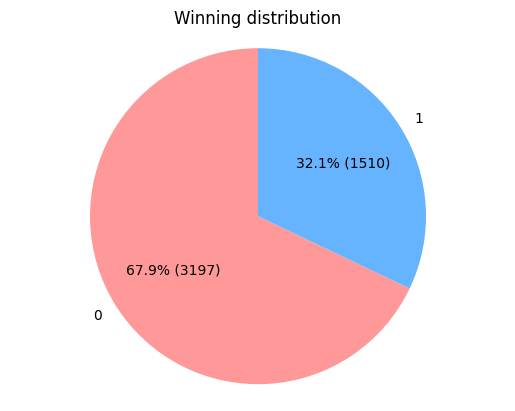

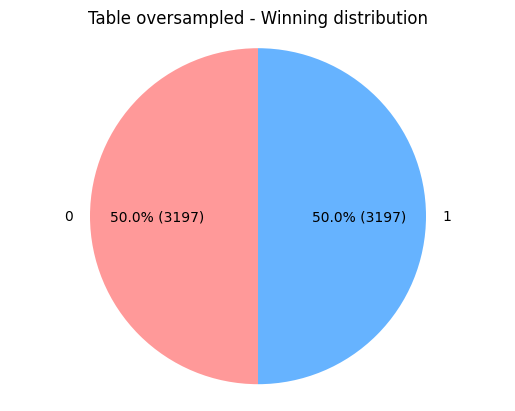

In [69]:
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#ff9999', '#66b3ff']
    
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')
    plt.title(title)
    plt.show()

plot_pie_chart(y_train, "Winning distribution")

plot_pie_chart(y_train_oversampled, "Table oversampled - Winning distribution")

winner_color
0    1510
1    1510
Name: count, dtype: int64


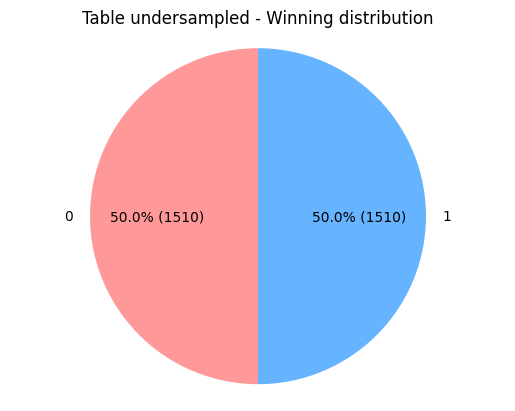

In [70]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

bankdata_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

print(bankdata_undersampled['winner_color'].value_counts())

plot_pie_chart(y_train_undersampled, "Table undersampled - Winning distribution")

## Cross validation

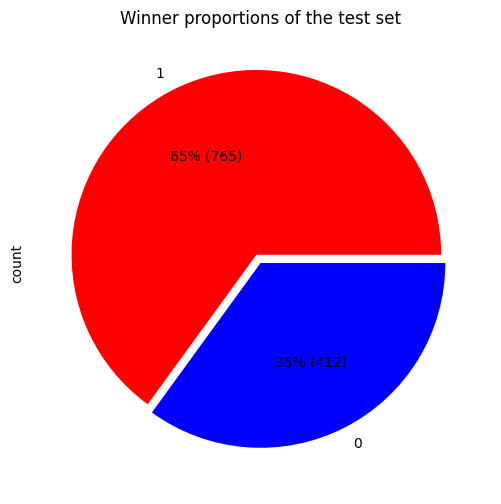

In [71]:
prop = y_test
prop.columns = ["winner_color", "proportion"]

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

ax = y_test.value_counts().plot(
    kind="pie",
    explode=(0.05, 0),
    autopct=lambda x: f'{x:.0f}% ({x/100*len(y_test):.0f})',
    colors=colors
)

plt.title("Winner proportions of the test set")
plt.show()

The test set seems to have a fairly similar split as the dataset, which should leave us with some good results for trying to determine the winner

## Feature and pipeline setup

In [72]:
numerical_features = ['R_KD', 'B_KD', 'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct',
    'R_SUB_ATT', 'B_SUB_ATT', 'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL',
    'R_SIG_STRIKE_LANDED', 'R_SIG_STRIKE_TOTAL', 'B_SIG_STRIKE_LANDED', 'B_SIG_STRIKE_TOTAL',
    'R_TOTAL_STRIKE_LANDED', 'B_TOTAL_STRIKE_LANDED', 'R_TOTAL_STRIKE_TOTAL', 'B_TOTAL_STRIKE_TOTAL',
    'R_TD_STRIKE_LANDED','B_TD_STRIKE_LANDED',  'R_TD_STRIKE_TOTAL', 'B_TD_STRIKE_TOTAL',
    'R_HEAD_LANDED','B_HEAD_LANDED',  'R_HEAD_TOTAL', 'B_HEAD_TOTAL',
    'R_BODY_LANDED', 'B_BODY_LANDED', 'R_BODY_TOTAL', 'B_BODY_TOTAL',
    'R_LEG_LANDED','B_LEG_LANDED',  'R_LEG_TOTAL', 'B_LEG_TOTAL',
    'R_DISTANCE_LANDED','B_DISTANCE_LANDED',  'R_DISTANCE_TOTAL', 'B_DISTANCE_TOTAL',
    'R_CLINCH_LANDED', 'B_CLINCH_LANDED', 'R_CLINCH_TOTAL', 'B_CLINCH_TOTAL',
    'R_GROUND_LANDED', 'B_GROUND_LANDED', 'R_GROUND_TOTAL', 'B_GROUND_TOTAL',
    'SLpM_Red', 'SLpM_Blue',  'SApM_Red', 'SApM_Blue',
    'Str_Acc_Red', 'Str_Acc_Blue', 'Str_Def_Red', 'Str_Def_Blue',
    'TD_Avg_Red', 'TD_Avg_Blue',  'TD_Def_Red', 'TD_Def_Blue', 
    'TD_Acc_Red','TD_Acc_Blue', 'Sub_Avg_Red','Sub_Avg_Blue']


In [73]:
def pipeline_function(estimator):
    
    scaler = MinMaxScaler()
    imputer = KNNImputer()
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    encoder = OneHotEncoder()
    feature_select = VarianceThreshold(threshold=0.02)

    numerical_pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=3)), 
                                        ("scaler", MinMaxScaler()),
                                        ("feature_select", SelectKBest(score_func=f_classif, k='all'))])

    categorical_pipeline = Pipeline(steps=[("encoder", OneHotEncoder()),
                                        ("selector", VarianceThreshold(threshold=0.05))])

    preprocessor = ColumnTransformer(transformers=[('numeric_preprocessing', numerical_pipeline, numerical_features)])

    model_pipeline = imbpipeline(steps=[('preprocessor', preprocessor), ("smote", SMOTE(sampling_strategy='auto', random_state=42)),
                                        ('pca', PCA(n_components=2)), 
                                        ('estimator', RFE(estimator, n_features_to_select = 5))])
    
    return model_pipeline

### Hold-out method

The best roc_auc_score is : 0.7108192780580075
The average score is 0.6888505214901218


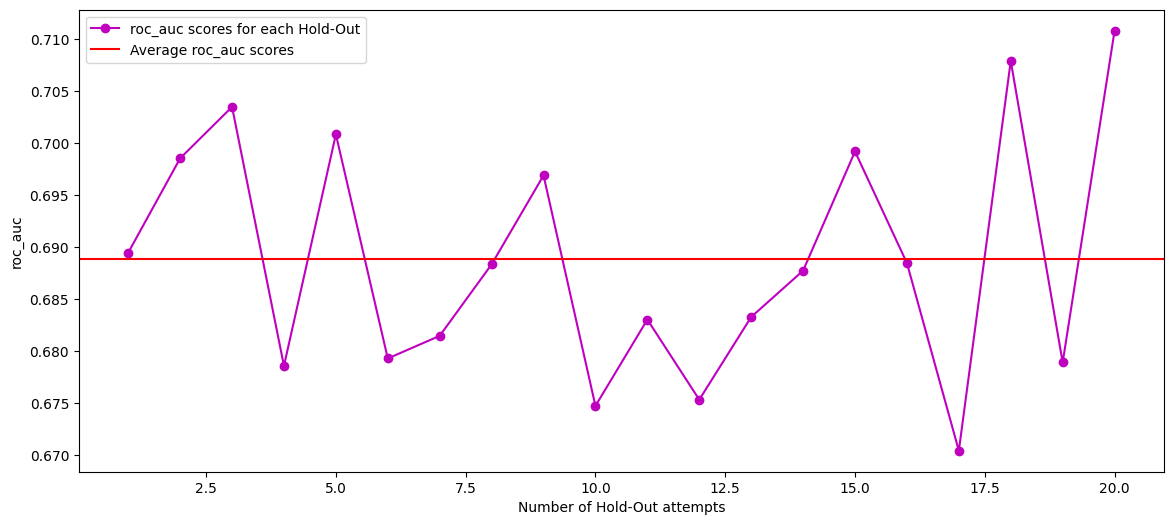

In [74]:
nbr = 20
y = LabelEncoder().fit_transform(y)
roc_auc = []

for i in range(nbr):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24+i, stratify=y)
    
    model = pipeline_function(LogisticRegression())
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = roc_auc_score(y_test, y_pred)
    roc_auc.append(score)
    
print(f'The best roc_auc_score is : {np.max(roc_auc)}')
print(f'The average score is {np.mean(roc_auc)}')     

plt.figure(figsize=(14, 6))
iter = np.arange(1, nbr+1)
plt.plot(iter, roc_auc, marker = 'o', linestyle = '-', color = 'm', label = 'roc_auc scores for each Hold-Out')
plt.axhline(y = np.mean(roc_auc), linestyle = '-', color = 'red', label = 'Average roc_auc scores')
plt.xlabel("Number of Hold-Out attempts")
plt.ylabel("roc_auc")
plt.legend();

Some slight fluctuations in the results, but over all I would argue this is a fairly strong score for this kind of data.

### K-Fold

Score with K-Fold cross validation: [0.71974276 0.76455169 0.76975187 0.78780409 0.75308166 0.81085928
 0.75771456 0.74065657 0.77986802 0.77287599 0.77680732 0.76529235
 0.75488716 0.73081761 0.77419973 0.76047537 0.69613821]
Mean of k-fold scores : 0.75973672068734


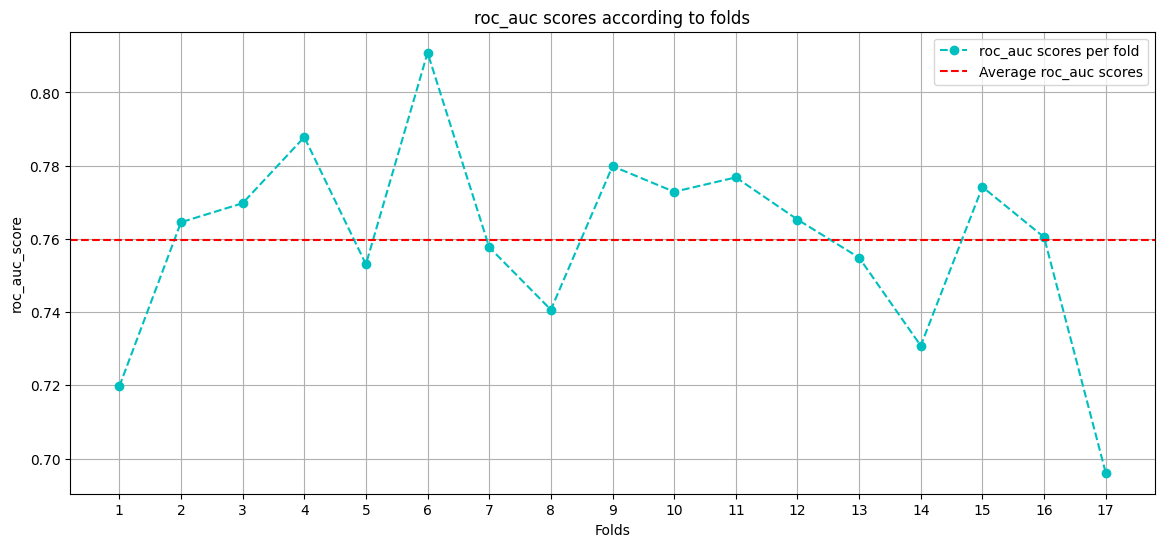

In [75]:
kfold = KFold(n_splits=17, random_state=0, shuffle=True)
score_kfold = cross_val_score(model, X, y, cv = kfold, scoring ="roc_auc")
print(f"Score with K-Fold cross validation: {score_kfold}")
print(f"Mean of k-fold scores : {np.mean(score_kfold)}")

plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_kfold)+1)
plt.plot(folds, score_kfold, marker = 'o', linestyle = '--', color = 'c', label = 'roc_auc scores per fold')
plt.axhline(y=np.mean(score_kfold), linestyle = '--', color = 'red', label = 'Average roc_auc scores')

plt.xlabel('Folds')
plt.ylabel('roc_auc_score')
plt.title('roc_auc scores according to folds')
plt.legend()
plt.xticks(folds)
plt.grid();

The K-Fold performs shows a slightly better performance, as the mean reaches 75%, which has to be seen as a very strong result. 

### Stratified K-Fold

Score with stratified K-Fold Cross Validation : [0.71388191 0.75303601 0.75013017 0.78574404 0.77877736 0.75815446
 0.7505787  0.74621212 0.78466961 0.75657618 0.76320497 0.77451599
 0.78666877 0.78188131 0.75520833 0.79329756 0.73058712 0.71254209
 0.74026726 0.77130682]
Average of Stratified K-Fold scores : 0.7593620391062014


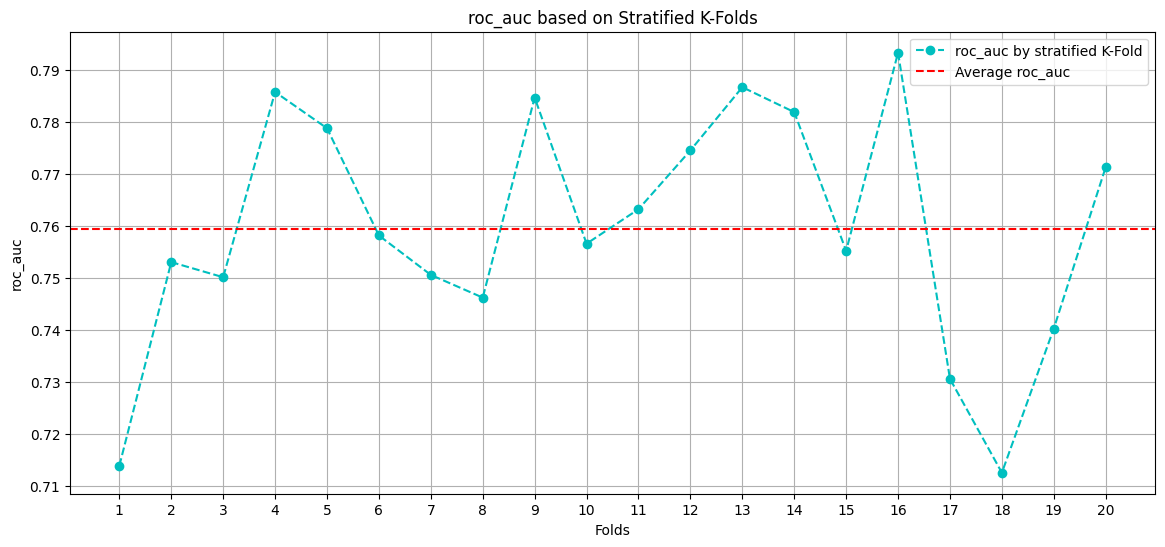

In [76]:
strat_kfold = StratifiedKFold(n_splits=20, random_state=0, shuffle=True)
score_strat_kfold = cross_val_score(model, X, y, cv = strat_kfold, scoring='roc_auc')
print(f"Score with stratified K-Fold Cross Validation : {score_strat_kfold}")
print(f"Average of Stratified K-Fold scores : {np.mean(score_strat_kfold)}")

plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_strat_kfold)+1)
plt.plot(folds, score_strat_kfold, marker = 'o', linestyle = '--', color = 'c', label = 'roc_auc by stratified K-Fold')
plt.axhline(y=np.mean(score_strat_kfold), linestyle = '--', color = 'red', label = 'Average roc_auc')

plt.xlabel('Folds')
plt.ylabel('roc_auc')
plt.title('roc_auc based on Stratified K-Folds')
plt.legend()
plt.xticks(folds)
plt.grid();

The stratified K-Fold doesn't give any larger difference in the performance compared to regular K-fold, and shows similar results, a very strong one.

# Models

### GNB model

In [77]:
from sklearn.naive_bayes import GaussianNB

seed = 404
np.random.seed(seed)

gnb = GaussianNB()
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(gnb, X_train, y_train, cv=kfold)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(cv_score.mean())
print()

Gaussian Naive Bayes K-fold Scores:
[0.8778626  0.82188295 0.82951654 0.80612245 0.82908163 0.83928571
 0.85714286 0.85204082 0.83928571 0.83673469 0.84438776 0.81377551]

Gaussian Naive Bayes Average Score:
0.8372599357809282



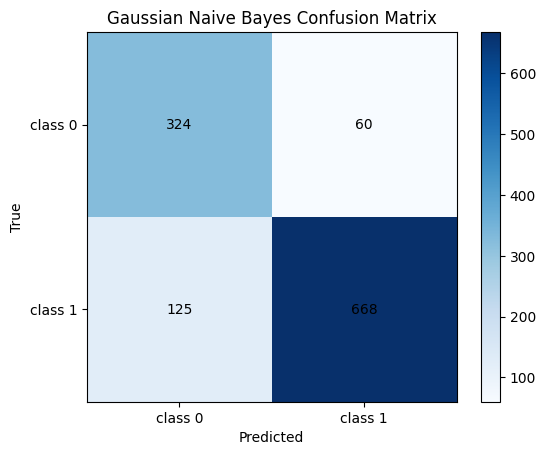

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.842820730671198


In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train)
y_pred = GNB_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()


print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

gnb_acc = accuracy_score(y_test, y_pred)

### Logistic Regression model

In [79]:
lr = LogisticRegression(max_iter = 5000)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(lr, X_train, y_train, cv=kfold)
lr_score = cv_score.mean()
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print(lr_score)

Logistic Regression K-fold Scores (training):
[0.90839695 0.89821883 0.87531807 0.88265306 0.87755102 0.89285714
 0.91326531 0.91326531 0.86479592 0.87244898 0.8622449  0.89030612]

Logistic Regression Average Score:
0.8876101331117688


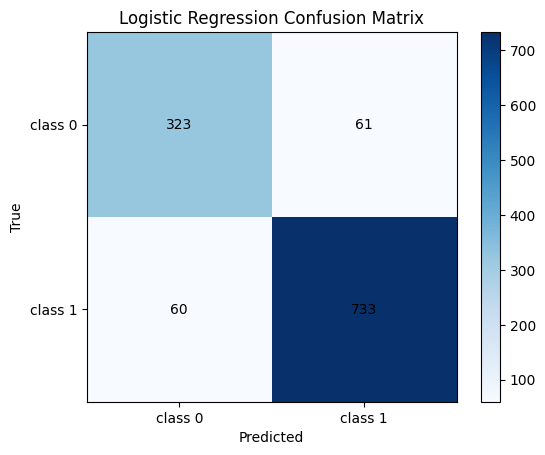

Logistic Regression Model Accuracy (on testing set): 
0.897196261682243


In [80]:
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
lr_acc = accuracy_score(y_test, y_pred)

### Decision Tree model

In [81]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(dt, X_train, y_train, cv=kfold)
dt_score = cv_score.mean()
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print(dt_score)

Decision Tree K-fold Scores:
[0.81933842 0.81933842 0.78117048 0.81632653 0.80867347 0.82142857
 0.82142857 0.86479592 0.78826531 0.83163265 0.82142857 0.81122449]

Decision Tree Average Score:
0.817087617489744


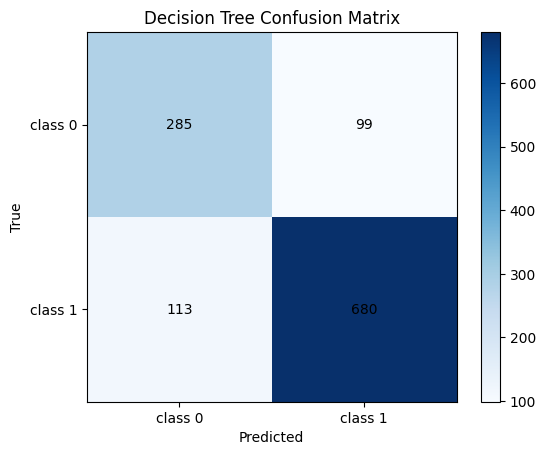

Decision Tree Model Accuracy (on testing set): 
0.8198810535259133


In [82]:
dt_model = dt.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('Decision Tree Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
dt_acc = accuracy_score(y_test, y_pred)

### KNN model

In [83]:
knn = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(knn, X_train, y_train, cv=kfold)
knn_score = cv_score.mean()
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print(knn_score)

KNN K-fold Scores):
[0.79643766 0.78117048 0.76844784 0.78571429 0.7627551  0.75765306
 0.80102041 0.79591837 0.7755102  0.80357143 0.79846939 0.78061224]

KNN Average Score:
0.7839400391199737


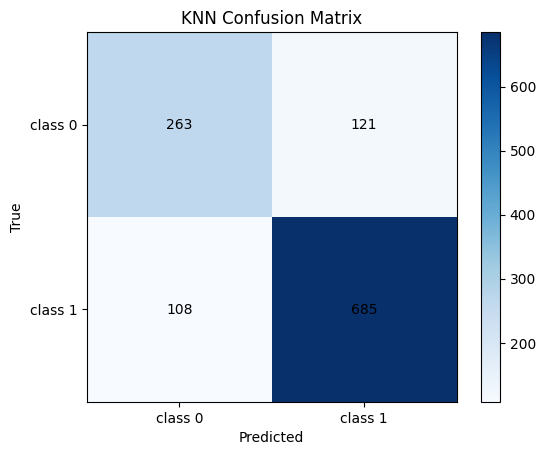

KNN Model Accuracy (on testing set): 
0.8054375531011045


In [84]:
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('KNN Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
knn_acc = accuracy_score(y_test, y_pred)

### Randon Forest model

In [85]:
rf = RandomForestClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(rf, X_train, y_train, cv=kfold)
rf_score = cv_score.mean()
print('Random Forest K-fold Scores:')
print(cv_score)
print()
print('Random Forest Average Score:')
print(rf_score)

Random Forest K-fold Scores:
[0.86005089 0.86768448 0.86513995 0.875      0.87244898 0.89540816
 0.88010204 0.89030612 0.86479592 0.89795918 0.87244898 0.86734694]

Random Forest Average Score:
0.8757243037163974


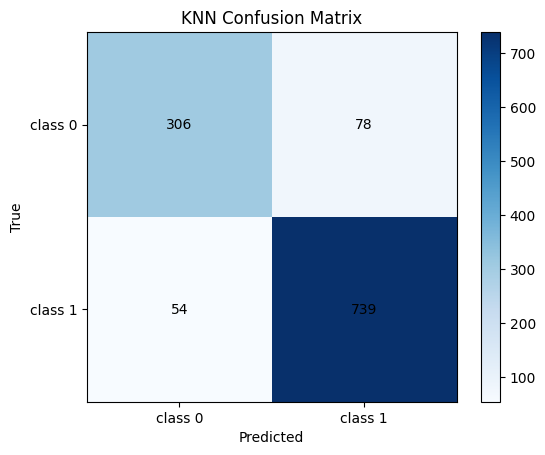

Random forest Accuracy (on testing set): 
0.8878504672897196


In [86]:
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('Random forest Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
rf_acc = accuracy_score(y_test, y_pred)

### SVC model

In [87]:
from sklearn.svm import SVC

svc = SVC(probability = True)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(svc, X_train, y_train, cv=kfold)
svc_score = cv_score.mean()
print('Support Vector Classification K-fold Scores:')
print(cv_score)
print()
print('Support Vector Classification Average Score:')
print(svc_score)

Support Vector Classification K-fold Scores:
[0.83969466 0.83969466 0.82951654 0.83928571 0.83673469 0.87244898
 0.85714286 0.8494898  0.80867347 0.88010204 0.85714286 0.85714286]

Support Vector Classification Average Score:
0.8472557598102854


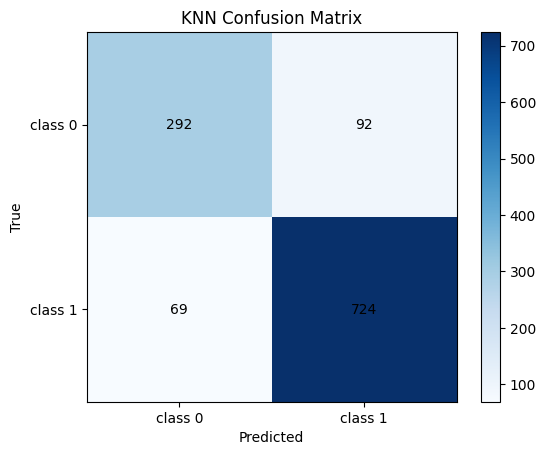

Support Vector Classification Accuracy (on testing set): 
0.8632115548003398


In [88]:
svc_model = svc.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('Support Vector Classification Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
svc_acc = accuracy_score(y_test, y_pred)

### XGBoost

In [89]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic',random_state =1)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
cv_score = cross_val_score(xgb, X_train, y_train, cv=kfold)
xgb_score = cv_score.mean()
print('XGBoost Classifier K-fold Scores:')
print(cv_score)
print()
print('XGBoost Classifier Average Score:')
print(xgb_score)

XGBoost Classifier K-fold Scores:
[0.89821883 0.8956743  0.87277354 0.89540816 0.875      0.89030612
 0.91581633 0.91581633 0.85204082 0.87755102 0.87244898 0.85714286]

XGBoost Classifier Average Score:
0.8848497732426305


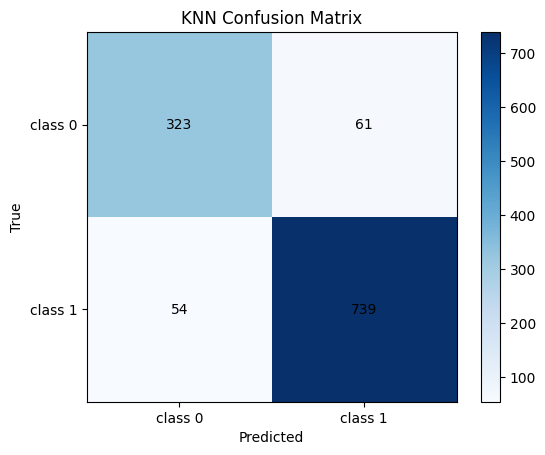

XGBoost Accuracy (on testing set): 
0.9022939677145284


In [90]:
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.xticks([0, 1], ['class 0', 'class 1'])
plt.yticks([0, 1], ['class 0', 'class 1'])

plt.show()

print('XGBoost Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))
xgb_acc = accuracy_score(y_test, y_pred)

### NN model

In [91]:
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_Train = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
y_Test = encoder.transform(y_test)

In [92]:
from keras.models import Sequential
from keras.layers import Dense

def create_model():
    model = Sequential()
    
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(128, activation='tanh'))
    model.add(Dense(128, activation='tanh'))    
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [93]:
from scikeras.wrappers import KerasClassifier

seed = 7
np.random.seed(seed)

model = KerasClassifier(model=create_model, epochs=50, batch_size=10, verbose=0)


kfold = KFold(n_splits=4, shuffle=True)
results = cross_val_score(model, X_train, y_Train, cv=kfold)
nn_score = cv_score.mean()
print('Neural Network K-fold Scores:')
print(cv_score)
print()
print('Neural Network Average Score:')
print(nn_score)

Neural Network K-fold Scores:
[0.89821883 0.8956743  0.87277354 0.89540816 0.875      0.89030612
 0.91581633 0.91581633 0.85204082 0.87755102 0.87244898 0.85714286]

Neural Network Average Score:
0.8848497732426305


(I tried doing a confusion matrix for the NN, but was too dumb, and my computer was almost catching fire while rerunning it for the 100th time, so I opted not to give it more tries.)

### Score comparision

In [94]:
scores =   [['Gaussian Naive Bayes', gnb_score],
            ['Logistic Regression', lr_score],
            ['Random Forest', rf_score],
            ['Decision Tree', dt_score],
            ['K-Nearest Neighbor', knn_score],
            ['Support Vector Classifier', svc_score],
            ['XGBoost', xgb_score],
            ['Neural Network', nn_score]]

df_scores = pd.DataFrame(scores,
                         columns = ['Test Model', 'Score Average']
                        )
print(tabulate(df_scores, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒════╤═══════════════════════════╤═════════════════╕
│    │ Test Model                │  Score Average  │
╞════╪═══════════════════════════╪═════════════════╡
│ 0  │ Gaussian Naive Bayes      │     0.83726     │
├────┼───────────────────────────┼─────────────────┤
│ 1  │ Logistic Regression       │     0.88761     │
├────┼───────────────────────────┼─────────────────┤
│ 2  │ Random Forest             │    0.875724     │
├────┼───────────────────────────┼─────────────────┤
│ 3  │ Decision Tree             │    0.817088     │
├────┼───────────────────────────┼─────────────────┤
│ 4  │ K-Nearest Neighbor        │     0.78394     │
├────┼───────────────────────────┼─────────────────┤
│ 5  │ Support Vector Classifier │    0.847256     │
├────┼───────────────────────────┼─────────────────┤
│ 6  │ XGBoost                   │     0.88485     │
├────┼───────────────────────────┼─────────────────┤
│ 7  │ Neural Network            │     0.88485     │
╘════╧═══════════════════════════╧════════════

On the test set, there is overall very strong performances from all models with Logistic Regression and XGBoost having the highest results

In [95]:
train_scores = [['Gaussian Naive Bayes', gnb_acc],
                ['Logistic Regression', lr_acc],
                ['Random Forest', rf_acc],
                ['Decision Tree', dt_acc],
                ['K-Nearest Neighbor', knn_acc],
                ['Support Vector Classifier', svc_acc],
                ['XGBoost', xgb_acc]]

df_train_scores = pd.DataFrame(train_scores,
                         columns = ['Trained Model', 'Score Average']
                        )
print(tabulate(df_train_scores, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒════╤═══════════════════════════╤═════════════════╕
│    │ Trained Model             │  Score Average  │
╞════╪═══════════════════════════╪═════════════════╡
│ 0  │ Gaussian Naive Bayes      │    0.842821     │
├────┼───────────────────────────┼─────────────────┤
│ 1  │ Logistic Regression       │    0.897196     │
├────┼───────────────────────────┼─────────────────┤
│ 2  │ Random Forest             │     0.88785     │
├────┼───────────────────────────┼─────────────────┤
│ 3  │ Decision Tree             │    0.819881     │
├────┼───────────────────────────┼─────────────────┤
│ 4  │ K-Nearest Neighbor        │    0.805438     │
├────┼───────────────────────────┼─────────────────┤
│ 5  │ Support Vector Classifier │    0.863212     │
├────┼───────────────────────────┼─────────────────┤
│ 6  │ XGBoost                   │    0.902294     │
╘════╧═══════════════════════════╧═════════════════╛


All models have a vary high accuracy, and in all frankness they might be performing a bit too well for what I consider should be a sport with a fair amount of randomness involved, but also, the red corner advantage might be something that scuffs the results to be very strong, as the 2 to 1 winrate coming from the red corner can't be an anamoly. 

With that being said, MMA is a very correlation heavy sport and in most cases the winner will be the one with the statistical advantage, as well as the fact that almost half of the fights go to decision being decided by the referees.

I spent some hours to play around with scaled data, but the results were fairly similar, and I felt that it would be redundant to implement the in the final report.

# Personal reflections on the dataset & assignment

In hindsight, it probably would have been more interesting to have a dataset with a bit more colorful columns, as a lot of the ones in this set are strongly correlated to one another, and that probably led to one-sided results, but then again, I did for sure learn things about the sport and most importantly regarding chasing and handling data. 

For sure there is still a lot to improve on and a lot that has to come by heart and not having to use help from the internet, and there should be some time that will be spent in the off-time in the summer that can be spent on that. 

There was probably a too early focus on thinking about building ML-models, that for sure affected the way that this notebook ended up looking, this is something that that I need to keep in mind for future projects, as there could have been some more knowledge coming out from the initial EDA.

There were, other than the EDA notebooks provided by you, mainly two other kaggle notebooks that I was inspired by and borrowed code from, they will be linked below.
Other than that, time was spent on googling documentation and of course, my very best friend in ChatGPT. 

Writing this now, I do have to say I regret not being able to spend more time on this assignment, but unfortunately life got a bit inbetween, and time got a bit scarce in the end, and I had to try to allocate time to the parts that I thought was the most relevant for the assignment, and as such, I didn't have time to spend on writing a report, which my initial intentions was.  

### References


MMA ML Model Fight Predictions (UFC 259)

https://www.kaggle.com/code/dbsimpson/mma-ml-model-fight-predictions-ufc-259#Mixed-Martial-Arts-and-the-UFC

UFC Win Prediction

https://www.kaggle.com/code/hidious/ufc-win-prediction

All of your EDA notebooks have been used and had code taken from as well.


In addition as mentioned, there has been a lot of time spent on looking on documentation of various libraries.